# Разведочный анализ данных (EDA)

## Загрузка датасетов

In [1]:
# Импорт необходимых библиотек

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# датасет с событиями для обучения
data_train_events = pd.read_csv('data/train_events.csv')

# Вывод датасета
data_train_events.sample(10)

event_timestamp                  region ua_device_type  \
1557514  2024-06-27 10:59:59+03:00      Khakasiya Republic     smartphone   
891478   2024-06-16 13:37:51+03:00      Khakasiya Republic     smartphone   
1048028  2024-06-18 05:16:14+03:00             Amur Oblast     smartphone   
1318715  2024-06-23 21:23:42+03:00          St.-Petersburg     smartphone   
747880   2024-06-13 12:10:53+03:00                  Moscow     smartphone   
838843   2024-06-15 11:02:42+03:00                  Moscow     smartphone   
1676385  2024-06-29 23:11:17+03:00      Novosibirsk Oblast     smartphone   
1005778  2024-06-17 21:28:47+03:00      Kaliningrad Oblast        desktop   
1367244  2024-06-24 15:56:41+03:00          Saratov Oblast         tablet   
831847   2024-06-15 06:10:24+03:00  Nizhny Novgorod Oblast     smartphone   

        ua_client_type    ua_os  ua_client_name  total_watchtime  \
1557514     mobile app  Android          Rutube             5458   
891478      mobile app  Android          Rutube             1532   
1048028     mobile app  Android          Rutube             5970   
1318715     mobile app  Android          Rutube            11222   
747880      mobile app      NaN          Rutube             2156   
838843      mobile app      NaN          Rutube               80   
1676385     mobile app  Android          Rutube             1710   
1005778        browser  Windows  Yandex Browser             5642   
1367244     mobile app  Android          Rutube             1910   
831847      mobile app  Android          Rutube              784   

        rutube_video_id  viewer_uid  
1557514    video_146587    10029205  
891478      video_54649    10026936  
1048028     video_77117    10047088  
1318715    video_316010    11084664  
747880     video_166733    10455553  
838843     video_306950    10028254  
1676385    video_380828    10312376  
1005778     video_54649    10215037  
1367244    video_359745    10109272  
831847     video_194685    10290161

Описание признаков: 
- event_ timestamp: Дата события (Время по москве)
- viewer_uid: id пользователя 
- rutube_video_id: id видео 
- region: Регион 
- ua_client_type: Браузер/приложение 
- ua_os: Название операционной системы пользователя 
- ua_client_name: Название браузера пользователя  
- total_watchtime: Время просмотра в секундах  

In [3]:
# датасет с информацией о видео
data_video_info = pd.read_csv('data/video_info_v2.csv')

# вывод датасета
data_video_info.sample(10)

rutube_video_id                                              title  \
159370    video_176550  Утро Донбасса. 26 июня 2024г. Приходите к нам ...   
204268    video_228944                            Группа USB - Кинобизнес   
154158     video_77145                                Историческое ателье   
425879    video_217655                      Video_2023_08_31_19_46_30.mp4   
102970    video_404817               свадьба в стиле "стиляги" в Борисове   
167292    video_163214  Турецкий язык. Урок 40. Сложные времена глагол...   
39324     video_408260  Сериал Шиттс Крик - 1 сезон 12 серия  / Schitt...   
209702    video_308564  Баир Иринчеев про политработников на Советско-...   
471145    video_238275  Читаем книжки. Григорий Остер «Нарушение прави...   
417378      video_7313                 КАК ПРОВОЗИТЬ ДРОН В САМОЛЕТЕ_.mp4   

                      category  duration  author_id  
159370            Телепередачи    826776    1013455  
204268                    Юмор    448362    1000008  
154158                Культура    663766    1033302  
425879               Лайфстайл    236983    1040186  
102970                  Разное    214692    1058751  
167292                Обучение   1544104    1023164  
39324                  Сериалы   1311978    1119896  
209702                Обучение   3840240    1010000  
471145                  Разное    267634    1061633  
417378  Техника и оборудование    183786    1014633

Описание признаков: 
- rutube_video_id: id видео 
- title: название видео 
- duration: длительность видео в миллисекундах 
- author_id: id автора видео 
- category: категория видео

In [4]:
# датасета с информацией о пользователях для обучения
data_train_targets = pd.read_csv('data/train_targets.csv')

# вывод датасета
data_train_targets.sample(10)

viewer_uid  age     sex  age_class
140754    10253146   29  female          1
45689     10673925   47  female          3
111310    10978696   24  female          1
37410     10120102   25    male          1
98004     10770919   38  female          2
176915    10194794   36    male          2
86835     10039161   38  female          2
158296    10165908   26  female          1
170588    10047193   24  female          1
26649     10054206   28  female          1

Описание признаков: 
- viewer_uid: id пользователя 
- age: возраст пользователя 
- sex: Пол пользователя 
- age_class: возрастная категория пользователя 

In [5]:
# дополнительный датасет с событиями
data_events = pd.read_csv('data/all_events.csv')

# вывод датасета
data_events.sample(10)

event_timestamp                           region  \
6086216  2024-06-22 01:05:07+03:00                   Krasnodar Krai   
7849396  2024-06-28 19:14:03+03:00                Sverdlovsk Oblast   
4375437  2024-06-16 10:03:23+03:00                           Moscow   
1528196  2024-06-06 05:57:18+03:00                    Moscow Oblast   
8007685  2024-06-29 08:08:37+03:00                           Moscow   
3932835  2024-06-14 03:17:10+03:00  Zabaykalskiy (Transbaikal) Kray   
1849723  2024-06-07 07:52:22+03:00                           Moscow   
990547   2024-06-04 12:57:49+03:00                    Ryazan Oblast   
3629007  2024-06-13 09:08:24+03:00                           Moscow   
6258334  2024-06-22 22:03:46+03:00                 Yaroslavl Oblast   

        ua_device_type ua_client_type    ua_os  ua_client_name  \
6086216        desktop        browser  Windows          Chrome   
7849396        desktop        browser  Windows  Yandex Browser   
4375437         tablet        browser  Android          Chrome   
1528196     smartphone     mobile app  Android          Rutube   
8007685     smartphone     mobile app  Android          Rutube   
3932835     smartphone     mobile app      NaN          Rutube   
1849723     smartphone     mobile app      NaN          Rutube   
990547         desktop        browser  Windows  Yandex Browser   
3629007         tablet     mobile app  Android          Rutube   
6258334     smartphone     mobile app  Android          Rutube   

         total_watchtime rutube_video_id  viewer_uid  
6086216             2511    video_314614    10290863  
7849396             1144    video_316010    10672145  
4375437              142    video_179074    11012274  
1528196              101     video_55702    10113763  
8007685             2332    video_263912    10307860  
3932835              671    video_230280    10742097  
1849723             2419      video_4990    10536369  
990547              2012    video_460572    10901667  
3629007             1003    video_207054    10132423  
6258334             5910    video_316010    10411050

### Анализ датасета с пользователями

In [6]:
# удаление возможных явных дубликатов и пустых строк

data_train_targets.dropna(inplace=True)
data_train_targets.drop_duplicates(inplace=True)

In [7]:
data_train_targets.sample(10)

viewer_uid  age     sex  age_class
6274      10000544   38    male          2
30227     10125487   24    male          1
105287    10049061   26  female          1
82878     10022050   43    male          3
56988     10483835   52  female          3
10471     10179813   21    male          1
124251    10025695   26  female          1
158891    10224406   31    male          2
126738    10828939   36    male          2
13958     10097482   24  female          1

In [8]:
# небольшая сводная информация

data_train_targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180012 entries, 0 to 180011
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   viewer_uid  180012 non-null  int64 
 1   age         180012 non-null  int64 
 2   sex         180012 non-null  object
 3   age_class   180012 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 5.5+ MB


In [9]:
data_train_targets['age'].describe()

count    180012.000000
mean         33.907195
std           9.025405
min          11.000000
25%          26.000000
50%          33.000000
75%          40.000000
max          54.000000
Name: age, dtype: float64

Как видим возраст пользователей распределен в диапазоне от 11 до 54 лет, а медианное значения на уровне 33 лет, рассмотрим количество пользователей различных возрастов и возрастных категорий

In [10]:
# Распределение количество пользователей по возрасту
distribution_of_users_age = data_train_targets['age'].value_counts().reset_index()
distribution_of_users_age.columns = ['age', 'count']

distribution_of_users_age.sample(10)

age  count
15   27   5951
4    37   6831
19   22   4962
23   21   3672
9    38   6338
16   39   5918
22   43   3871
35   53   1968
25   45   3308
38   12    199

##### Вывод диаграмм с распределением количества пользователей по возрастам

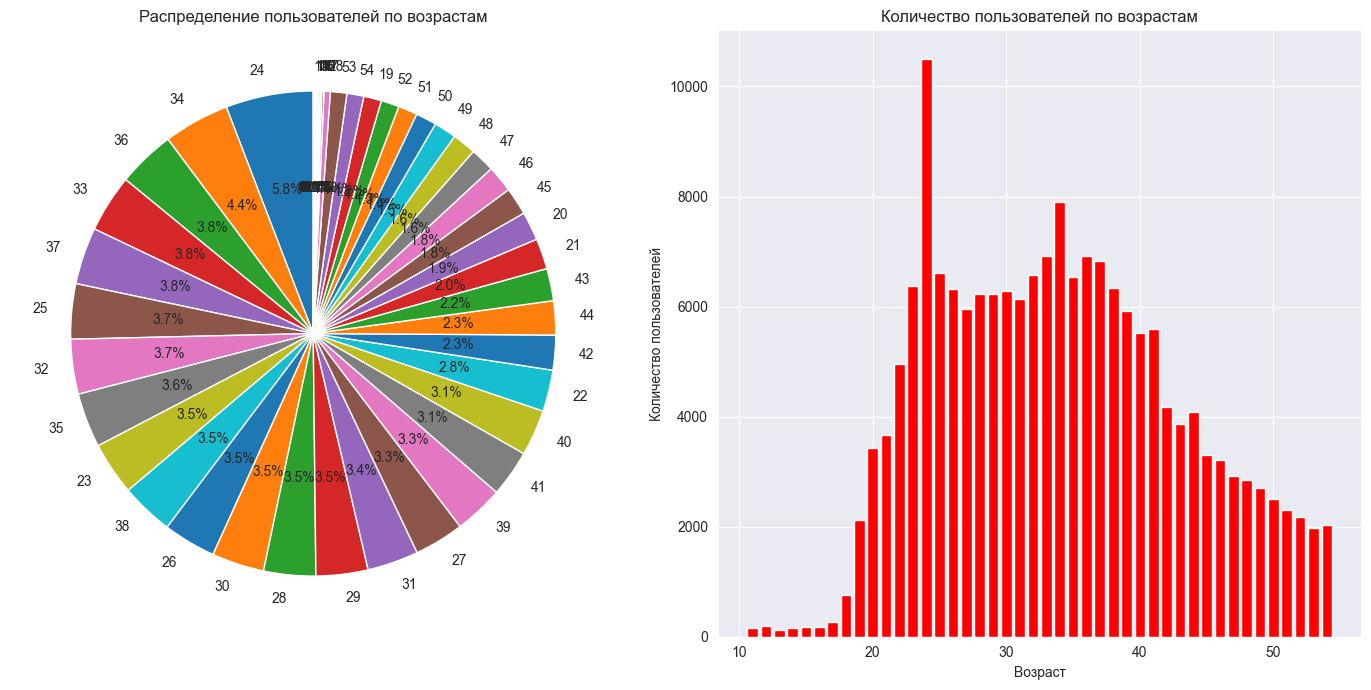

In [11]:
# Круговая диаграмма
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.pie(distribution_of_users_age['count'], labels=distribution_of_users_age['age'], autopct='%1.1f%%', startangle=90)
plt.title('Распределение пользователей по возрастам')

# Колончатая диаграмма
plt.subplot(1, 2, 2)
plt.bar(distribution_of_users_age['age'], distribution_of_users_age['count'], color='red')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.title('Количество пользователей по возрастам')

# Показываем диаграммы
plt.tight_layout()
plt.show()

In [12]:
distribution_of_users_age_class = data_train_targets['age_class'].value_counts().reset_index()
distribution_of_users_age_class.columns = ['age_class', 'count']

distribution_of_users_age_class

age_class  count
0          2  65600
1          1  63131
2          3  43690
3          0   7591

In [13]:
#### Вывод диаграмм с распределением количества пользователей по возрастным категориям

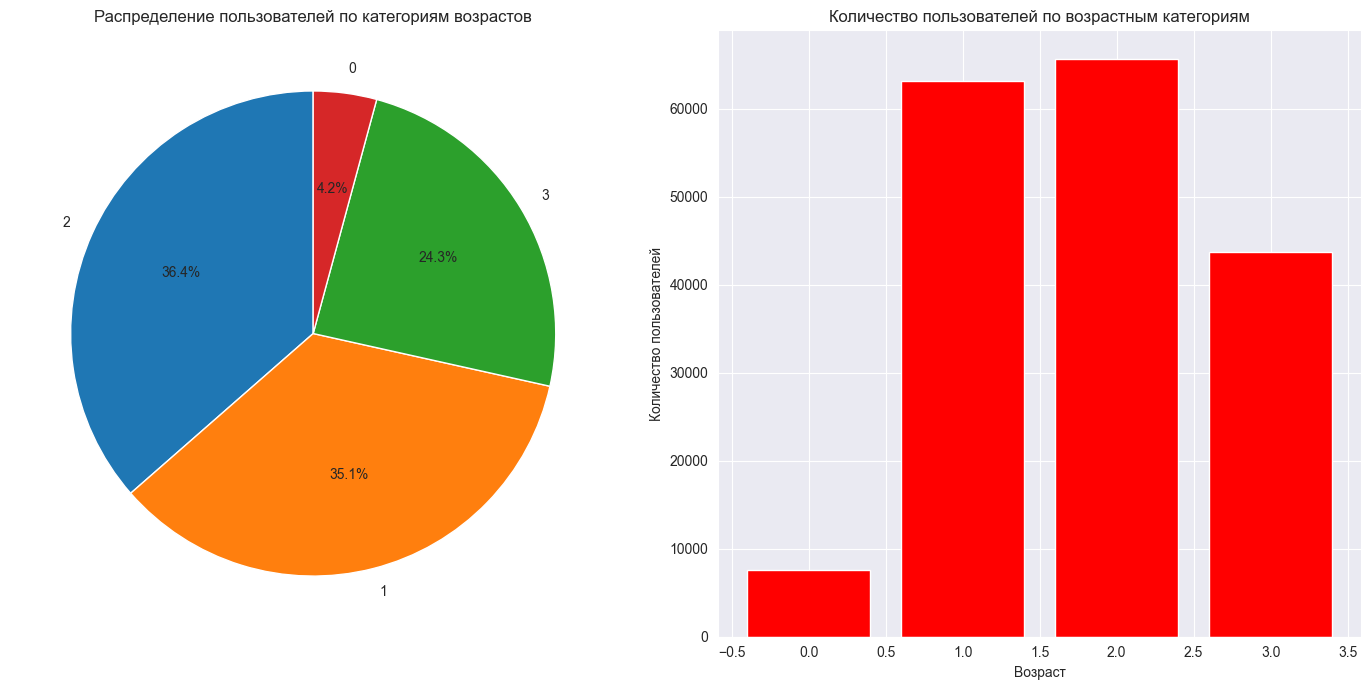

In [14]:
# Круговая диаграмма
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.pie(distribution_of_users_age_class['count'], labels=distribution_of_users_age_class['age_class'], autopct='%1.1f%%', startangle=90)
plt.title('Распределение пользователей по категориям возрастов')

# Колончатая диаграмма
plt.subplot(1, 2, 2)
plt.bar(distribution_of_users_age_class['age_class'], distribution_of_users_age_class['count'], color='red')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.title('Количество пользователей по возрастным категориям')

# Показываем диаграммы
plt.tight_layout()
plt.show()

Из представленного выше можно сделать вывод о том, существует явный дисбаланс пользователей различных возрастных категорий.

Распределение полов

In [15]:
# Распределение количество пользователей по полу
distribution_of_users_sex = data_train_targets['sex'].value_counts().reset_index()
distribution_of_users_sex.columns = ['sex', 'count']

distribution_of_users_sex

sex  count
0  female  90098
1    male  89914

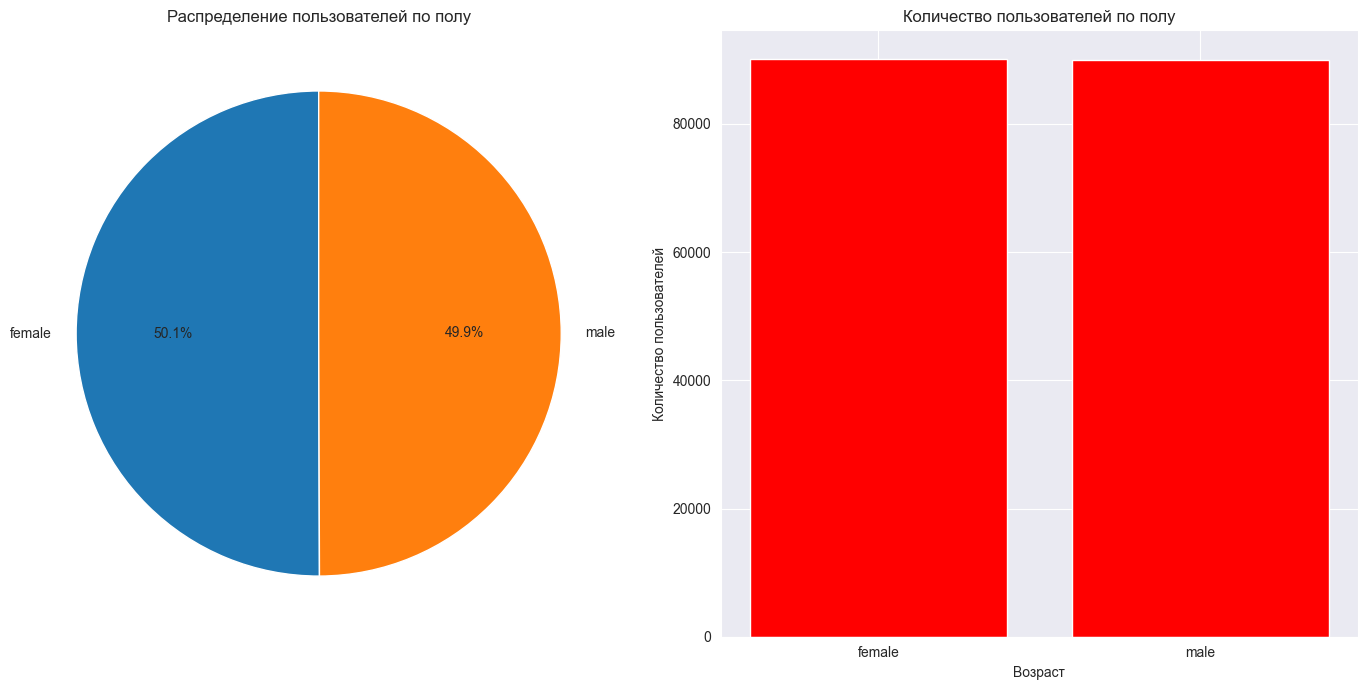

In [16]:
# Круговая диаграмма
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.pie(distribution_of_users_sex['count'], labels=distribution_of_users_sex['sex'], autopct='%1.1f%%', startangle=90)
plt.title('Распределение пользователей по полу')

# Колончатая диаграмма
plt.subplot(1, 2, 2)
plt.bar(distribution_of_users_sex['sex'], distribution_of_users_sex['count'], color='red')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.title('Количество пользователей по полу')

# Показываем диаграммы
plt.tight_layout()
plt.show()

In [17]:
not_num_train_users = data_train_targets.copy()

Переведем столбец sex к числовому типy заменив male на 1 а female на 0

In [18]:
data_train_targets['sex'] = data_train_targets['sex'].replace({'male': 1, 'female': 0})

C:\Users\capy\AppData\Local\Temp\ipykernel_12636\2195360068.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_train_targets['sex'] = data_train_targets['sex'].replace({'male': 1, 'female': 0})


## Анализ датасета с историей просмотров(ивентами)

In [19]:
# удаление возможных явных дубликатов и пустых строк

data_train_events.dropna(inplace=True)
data_train_events.drop_duplicates(inplace=True)

In [20]:
# Вывод датасета

data_train_events.sample(10)

event_timestamp           region ua_device_type  \
1042239  2024-06-18 16:22:27+03:00   Krasnodar Krai        desktop   
590747   2024-06-10 17:59:12+03:00           Moscow     smartphone   
170554   2024-06-03 10:58:37+03:00           Moscow     smartphone   
1459334  2024-06-25 16:31:01+03:00    Samara Oblast     smartphone   
645388   2024-06-11 20:08:34+03:00   Krasnodar Krai        desktop   
1177517  2024-06-20 16:41:11+03:00  Belgorod Oblast        desktop   
899267   2024-06-16 12:09:46+03:00           Moscow         tablet   
1737862  2024-06-30 06:55:45+03:00   Krasnodar Krai     smartphone   
139127   2024-06-03 06:54:00+03:00      Chelyabinsk     smartphone   
721273   2024-06-13 08:35:35+03:00    Moscow Oblast     smartphone   

        ua_client_type    ua_os  ua_client_name  total_watchtime  \
1042239        browser  Windows           Opera              142   
590747      mobile app  Android          Rutube             2675   
170554      mobile app  Android          Rutube              262   
1459334        browser      iOS   Mobile Safari             3775   
645388         browser  Windows  Yandex Browser             2573   
1177517        browser  Windows  Yandex Browser              451   
899267      mobile app  Android          Rutube             5563   
1737862     mobile app  Android          Rutube             1375   
139127      mobile app  Android          Rutube             4369   
721273      mobile app  Android          Rutube               52   

        rutube_video_id  viewer_uid  
1042239    video_265263    10312588  
590747     video_387758    10926971  
170554     video_286415    10350103  
1459334     video_80057    10061925  
645388     video_404033    10037928  
1177517     video_77117    10028443  
899267     video_128965    10036831  
1737862    video_283703    10017832  
139127     video_466647    10006674  
721273      video_47528    10021195

Приведем все строковые данные к нижнему регистру

In [21]:
# приведение к нижнему регистру

data_train_events['region'] = data_train_events['region'].str.lower()
data_train_events['ua_device_type'] = data_train_events['ua_device_type'].str.lower()
data_train_events['ua_client_type'] = data_train_events['ua_client_type'].str.lower()
data_train_events['ua_os'] = data_train_events['ua_os'].str.lower()
data_train_events['ua_client_name'] = data_train_events['ua_client_name'].str.lower()

In [22]:
# некоторая сводная информация

data_train_events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1641945 entries, 0 to 1759615
Data columns (total 9 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   event_timestamp  1641945 non-null  object
 1   region           1641945 non-null  object
 2   ua_device_type   1641945 non-null  object
 3   ua_client_type   1641945 non-null  object
 4   ua_os            1641945 non-null  object
 5   ua_client_name   1641945 non-null  object
 6   total_watchtime  1641945 non-null  int64 
 7   rutube_video_id  1641945 non-null  object
 8   viewer_uid       1641945 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 125.3+ MB


С помощью столбца с датой и временем добавим 2 новых столбца - столбец со временем(в часах) в данном регионе и столбец с днем недели.

In [23]:
# перевод столбца с датой в тип datetime и добавление столбца с днем недели

data_train_events['event_timestamp'] = pd.to_datetime(data_train_events['event_timestamp'])
data_train_events['day_of_week'] = data_train_events['event_timestamp'].dt.day_name()

data_train_events.sample(10)

event_timestamp              region ua_device_type  \
417411  2024-06-08 00:20:38+03:00      lipetsk oblast     smartphone   
431129  2024-06-08 21:51:17+03:00        pskov oblast     smartphone   
1043580 2024-06-18 14:55:18+03:00    adygeya republic        desktop   
1206675 2024-06-21 06:25:01+03:00     sakhalin oblast     smartphone   
968126  2024-06-17 19:03:35+03:00  novosibirsk oblast        desktop   
26273   2024-06-01 16:37:35+03:00      krasnodar krai     smartphone   
1355919 2024-06-24 02:45:38+03:00            primorye        desktop   
523485  2024-06-09 09:49:41+03:00      st.-petersburg     smartphone   
1291973 2024-06-22 23:05:34+03:00           perm krai     smartphone   
69655   2024-06-02 15:42:03+03:00  novosibirsk oblast     smartphone   

        ua_client_type    ua_os  ua_client_name  total_watchtime  \
417411      mobile app  android          rutube             2954   
431129      mobile app  android          rutube             4943   
1043580        browser  windows  yandex browser              161   
1206675     mobile app  android          rutube             5222   
968126         browser  windows           opera             4068   
26273       mobile app  android          rutube             4581   
1355919        browser      mac          safari             4264   
523485      mobile app  android          rutube              560   
1291973     mobile app  android          rutube             2578   
69655       mobile app  android          rutube              231   

        rutube_video_id  viewer_uid day_of_week  
417411      video_44155    10089573    Saturday  
431129     video_152340    10446934    Saturday  
1043580    video_292424    10356453     Tuesday  
1206675    video_400566    10034274      Friday  
968126     video_340614    10723226      Monday  
26273      video_405747    10065175    Saturday  
1355919    video_193504    10028328      Monday  
523485     video_340135    10171601      Sunday  
1291973    video_128467    10048354    Saturday  
69655       video_39389    10022027      Sunday

In [24]:
from data.encoders.time_zones import region_timezones
from pytz import timezone


# Функция для конвертации московского времени в местное
def convert_to_local_time(row):
    moscow_time = pd.to_datetime(row['event_timestamp'])
    local_timezone = timezone(region_timezones.get(row['region'], 'Europe/Moscow'))
    
    # Конвертация московского времени в местное
    moscow_time = moscow_time.tz_convert('Europe/Moscow')  # Время уже в зоне Москвы
    local_time = moscow_time.astimezone(local_timezone)
    
    local_hour = local_time.hour + local_time.minute / 60  # Учитываем минуты для округления
    return round(local_hour)

In [25]:
# Применяем функцию к каждому ряду и создаем новый столбец
data_train_events['local_time'] = data_train_events.apply(convert_to_local_time, axis=1)

# Также удалим приписку video_ у id видео

data_train_events['rutube_video_id'] = data_train_events['rutube_video_id'].str.replace('video_', '')
data_train_events['rutube_video_id'] = data_train_events['rutube_video_id'].astype(int)

data_train_events.sample(10)

event_timestamp                  region ua_device_type  \
812746  2024-06-14 12:04:55+03:00           moscow oblast     smartphone   
84151   2024-06-02 01:51:33+03:00  leningradskaya oblast'        desktop   
1670662 2024-06-29 21:09:19+03:00  leningradskaya oblast'     smartphone   
1589386 2024-06-27 15:28:50+03:00              khabarovsk     smartphone   
1545037 2024-06-27 22:28:35+03:00       sverdlovsk oblast     smartphone   
1519454 2024-06-26 11:02:12+03:00                  moscow        desktop   
960868  2024-06-17 11:43:24+03:00          krasnodar krai         tablet   
317207  2024-06-06 18:36:07+03:00           samara oblast        desktop   
298420  2024-06-06 14:31:28+03:00      udmurtiya republic     smartphone   
4735    2024-06-01 18:40:36+03:00         orenburg oblast     smartphone   

        ua_client_type    ua_os     ua_client_name  total_watchtime  \
812746         browser      ios  chrome mobile ios               42   
84151          browser  windows     yandex browser             2046   
1670662     mobile app  android             rutube             3848   
1589386     mobile app  android             rutube              349   
1545037     mobile app  android             rutube             2091   
1519454        browser  windows     yandex browser             2351   
960868      mobile app  android             rutube             6212   
317207         browser      mac             safari              112   
298420      mobile app  android             rutube             8533   
4735        mobile app  android             rutube             1281   

         rutube_video_id  viewer_uid day_of_week  local_time  
812746            398362    10894054      Friday          12  
84151             138719    10039599      Sunday           2  
1670662           308266    10057243    Saturday          21  
1589386           465958    10202316    Thursday          22  
1545037            76334    10911848    Thursday           0  
1519454            19195    10070714   Wednesday          11  
960868            321650    10010181      Monday          12  
317207            189095    10899717    Thursday          20  
298420            373422    10088862    Thursday          16  
4735              384686    10084967    Saturday          21

In [26]:
not_num_train_events = data_train_events.copy()

In [27]:
# Распределение количество просмотров по регионам
distribution_of_reg = data_train_events['region'].value_counts().reset_index()
distribution_of_reg.columns = ['region', 'count']

distribution_of_reg.sample(10)

region  count
54            penza oblast   5320
98           north ossetia    460
69            kursk oblast   3191
94               jaroslavl    721
15        yaroslavl oblast  23288
71                 karelia   3128
33         vladimir oblast  10130
112  transbaikal territory    103
26             omsk oblast  12620
30              altay kray  11954

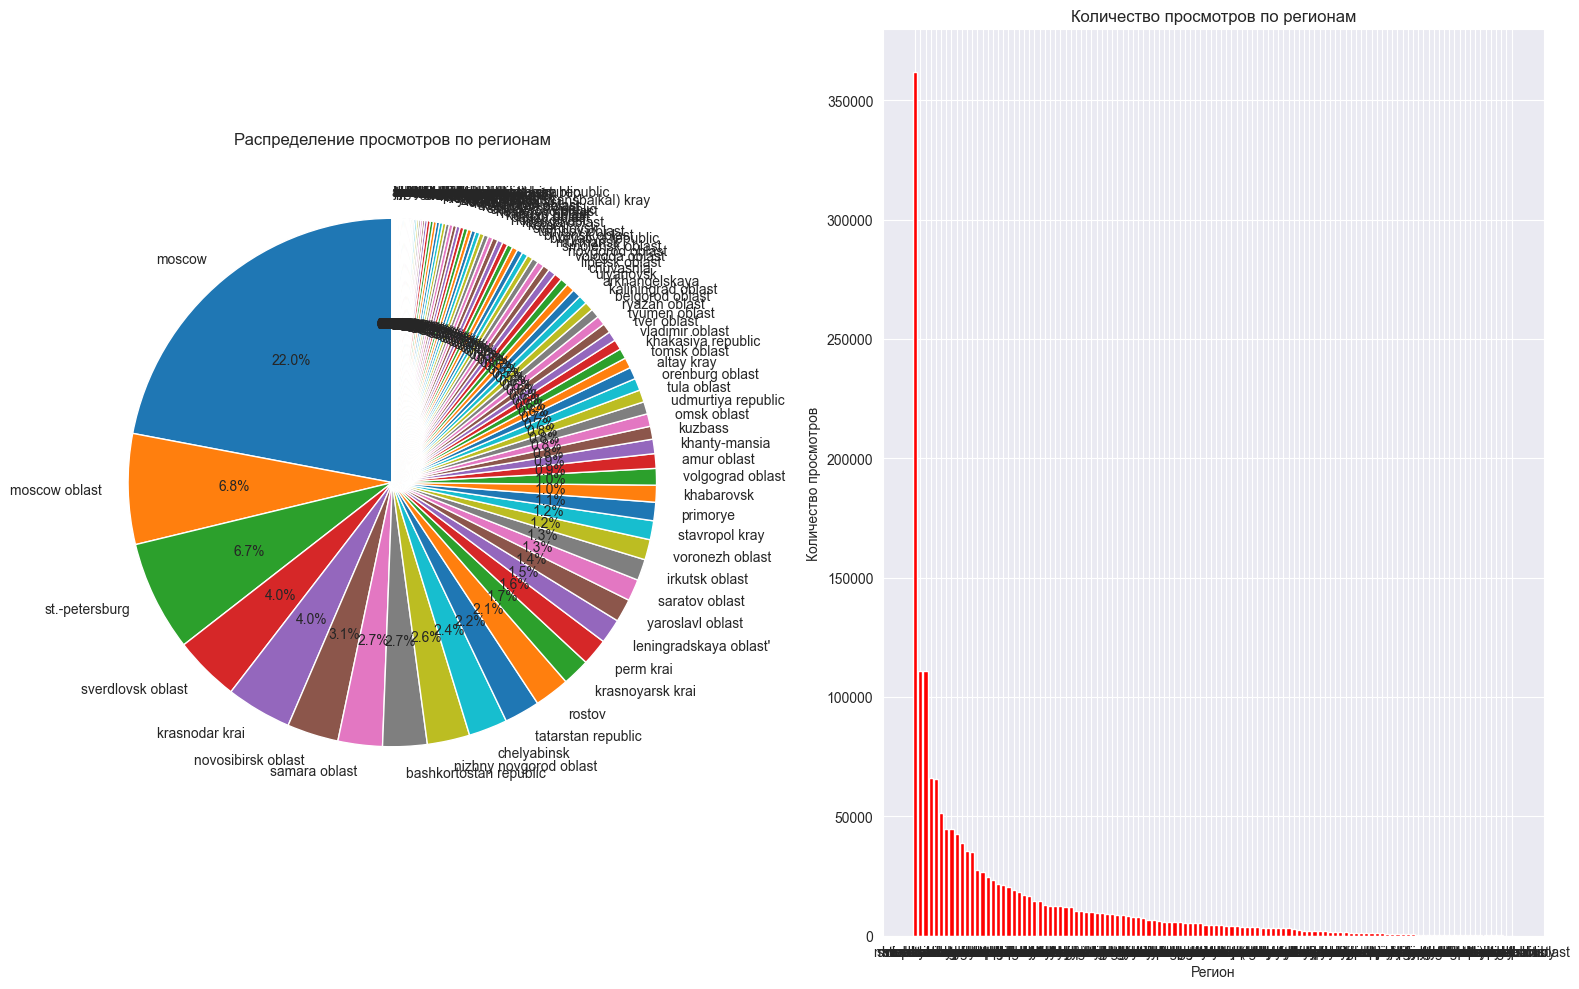

In [28]:
# Круговая диаграмма
plt.figure(figsize=(16, 10))

plt.subplot(1, 2, 1)
plt.pie(distribution_of_reg['count'], labels=distribution_of_reg['region'], autopct='%1.1f%%', startangle=90)
plt.title('Распределение просмотров по регионам')

# Колончатая диаграмма
plt.subplot(1, 2, 2)
plt.bar(distribution_of_reg['region'], distribution_of_reg['count'], color='red')
plt.xlabel('Регион')
plt.ylabel('Количество просмотров')
plt.title('Количество просмотров по регионам')

# Показываем диаграммы
plt.tight_layout()
plt.show()

In [29]:
# Распределение количество просмотров по дням недели
distribution_of_reg = data_train_events['day_of_week'].value_counts().reset_index()
distribution_of_reg.columns = ['day_of_week', 'count']

distribution_of_reg

day_of_week   count
0      Sunday  275514
1      Monday  254891
2    Saturday  237182
3     Tuesday  231074
4   Wednesday  220712
5    Thursday  217564
6      Friday  205008

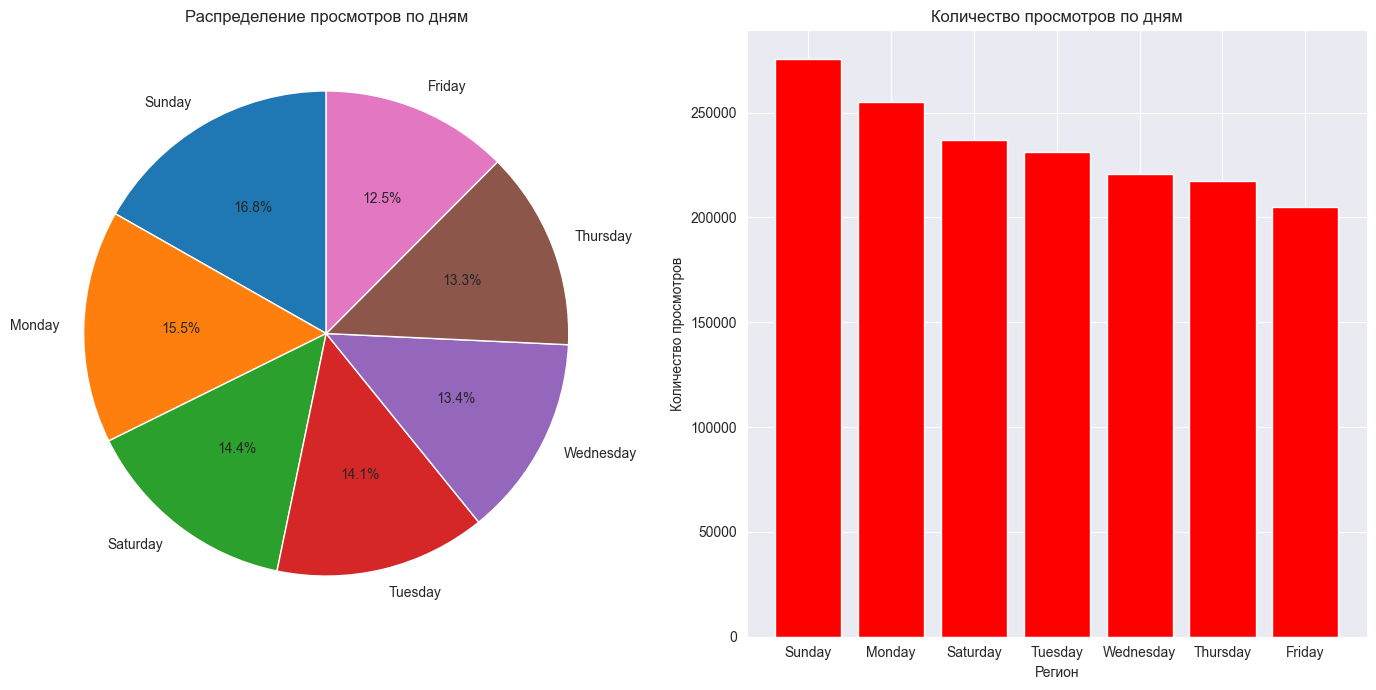

In [30]:
# Круговая диаграмма
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.pie(distribution_of_reg['count'], labels=distribution_of_reg['day_of_week'], autopct='%1.1f%%', startangle=90)
plt.title('Распределение просмотров по дням')

# Колончатая диаграмма
plt.subplot(1, 2, 2)
plt.bar(distribution_of_reg['day_of_week'], distribution_of_reg['count'], color='red')
plt.xlabel('Регион')
plt.ylabel('Количество просмотров')
plt.title('Количество просмотров по дням')

# Показываем диаграммы
plt.tight_layout()
plt.show()

In [31]:
# некоторые характеристики
data_train_events.describe()

total_watchtime  rutube_video_id    viewer_uid    local_time
count     1.641945e+06     1.641945e+06  1.641945e+06  1.641945e+06
mean      2.201089e+03     2.364645e+05  1.023135e+07  1.428375e+01
std       4.130273e+03     1.403365e+05  2.715053e+05  6.782537e+00
min       3.100000e+01     5.000000e+00  1.000000e+07  0.000000e+00
25%       5.720000e+02     1.158060e+05  1.004578e+07  1.000000e+01
50%       1.852000e+03     2.258710e+05  1.010300e+07  1.500000e+01
75%       2.901000e+03     3.625630e+05  1.031935e+07  2.000000e+01
max       2.489070e+06     4.814760e+05  1.114089e+07  2.400000e+01

## Анализ датасета с информацией о видео

In [32]:
# удаление возможных явных дубликатов и пустых строк

data_video_info.dropna(inplace=True)
data_video_info.drop_duplicates(inplace=True)

In [33]:
data_video_info

rutube_video_id                                              title  \
0         video_185549  Как собрать букет из мыльных тюльпанов - Силик...   
1         video_111035        Осторожно, Киберземляне!, 1 сезон, 12 серия   
2         video_476517  ПОПУЛЯРНЫЕ ВИДЕОИГРЫ в LEGO... перевод - TD BR...   
3         video_157198                         Хороший лжец (фильм, 2019)   
4         video_289824                   Нашего старого гнобят по-всякому   
...                ...                                                ...   
481475    video_196126                          14. Landscape Layer Blend   
481476    video_390909         Рихард Штраус: Завтра! — Людмила Рубинская   
481477    video_326364  Поймай Тинипин! Королевство эмоций, 2 серия. С...   
481478    video_374957   ВОРКУТА. 1 СЕРИЯ. УЖАСЫ. ПСИХОЛОГИЧЕСКИЙ ТРИЛЛЕР   
481479     video_29223  Церемония вручения Национальной детской премии...   

            category  duration  author_id  
0              Хобби   1559160    1015054  
1            Сериалы   1320007    1002180  
2              Хобби    606145    1095337  
3             Фильмы   6577440    1043618  
4        Развлечения    859493    1009535  
...              ...       ...        ...  
481475        Дизайн    462000    1121338  
481476        Музыка    227628    1043510  
481477   Мультфильмы    744576    1002799  
481478  Люди и блоги   2597385    1008386  
481479         Детям   5976166    1026149  

[481480 rows x 5 columns]

In [34]:
data_video_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481480 entries, 0 to 481479
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   rutube_video_id  481480 non-null  object
 1   title            481480 non-null  object
 2   category         481480 non-null  object
 3   duration         481480 non-null  int64 
 4   author_id        481480 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 18.4+ MB


Переведем строки к нижнему регистру

In [35]:
data_video_info['title'] = data_video_info['title'].str.lower()
data_video_info['category'] = data_video_info['category'].str.lower()

Приведение id видео к числу как это было выше

In [36]:
data_video_info['rutube_video_id'] = data_video_info['rutube_video_id'].str.replace('video_', '')
data_video_info['rutube_video_id'] = data_video_info['rutube_video_id'].astype(int)

In [37]:
data_video_info

rutube_video_id                                              title  \
0                185549  как собрать букет из мыльных тюльпанов - силик...   
1                111035        осторожно, киберземляне!, 1 сезон, 12 серия   
2                476517  популярные видеоигры в lego... перевод - td br...   
3                157198                         хороший лжец (фильм, 2019)   
4                289824                   нашего старого гнобят по-всякому   
...                 ...                                                ...   
481475           196126                          14. landscape layer blend   
481476           390909         рихард штраус: завтра! — людмила рубинская   
481477           326364  поймай тинипин! королевство эмоций, 2 серия. с...   
481478           374957   воркута. 1 серия. ужасы. психологический триллер   
481479            29223  церемония вручения национальной детской премии...   

            category  duration  author_id  
0              хобби   1559160    1015054  
1            сериалы   1320007    1002180  
2              хобби    606145    1095337  
3             фильмы   6577440    1043618  
4        развлечения    859493    1009535  
...              ...       ...        ...  
481475        дизайн    462000    1121338  
481476        музыка    227628    1043510  
481477   мультфильмы    744576    1002799  
481478  люди и блоги   2597385    1008386  
481479         детям   5976166    1026149  

[481480 rows x 5 columns]

In [38]:
not_num_video_info = data_video_info.copy()

Построим распределение видео по категориям

In [39]:
# Распределение количество просмотров по дням недели
distribution_of_cat = data_video_info['category'].value_counts().reset_index()
distribution_of_cat.columns = ['category', 'count']

distribution_of_cat

category   count
0                         разное  141342
1                        сериалы   49860
2                   телепередачи   35510
3                      видеоигры   33585
4                         музыка   27295
5                    развлечения   22506
6                         фильмы   16579
7                       обучение   13206
8                      лайфстайл   12438
9                           юмор   10281
10                         детям   10227
11                     авто-мото    8212
12                         аниме    7504
13                         спорт    7490
14                      интервью    7115
15                   мультфильмы    6374
16                           еда    5788
17                     эзотерика    5765
18                   путешествия    5481
19         технологии и интернет    5044
20                         хобби    4744
21                      культура    4301
22        техника и оборудование    4223
23                    аудиокниги    3880
24                      здоровье    3518
25                    психология    3164
26   обзоры и распаковки товаров    2968
27                         наука    2823
28  бизнес и предпринимательство    2555
29        строительство и ремонт    2421
30                  люди и блоги    2192
31                      животные    2131
32                  сад и огород    1923
33               охота и рыбалка    1879
34                      лайфхаки    1827
35                       красота    1795
36                       природа    1294
37                         аудио    1125
38                  недвижимость     631
39                        дизайн     484

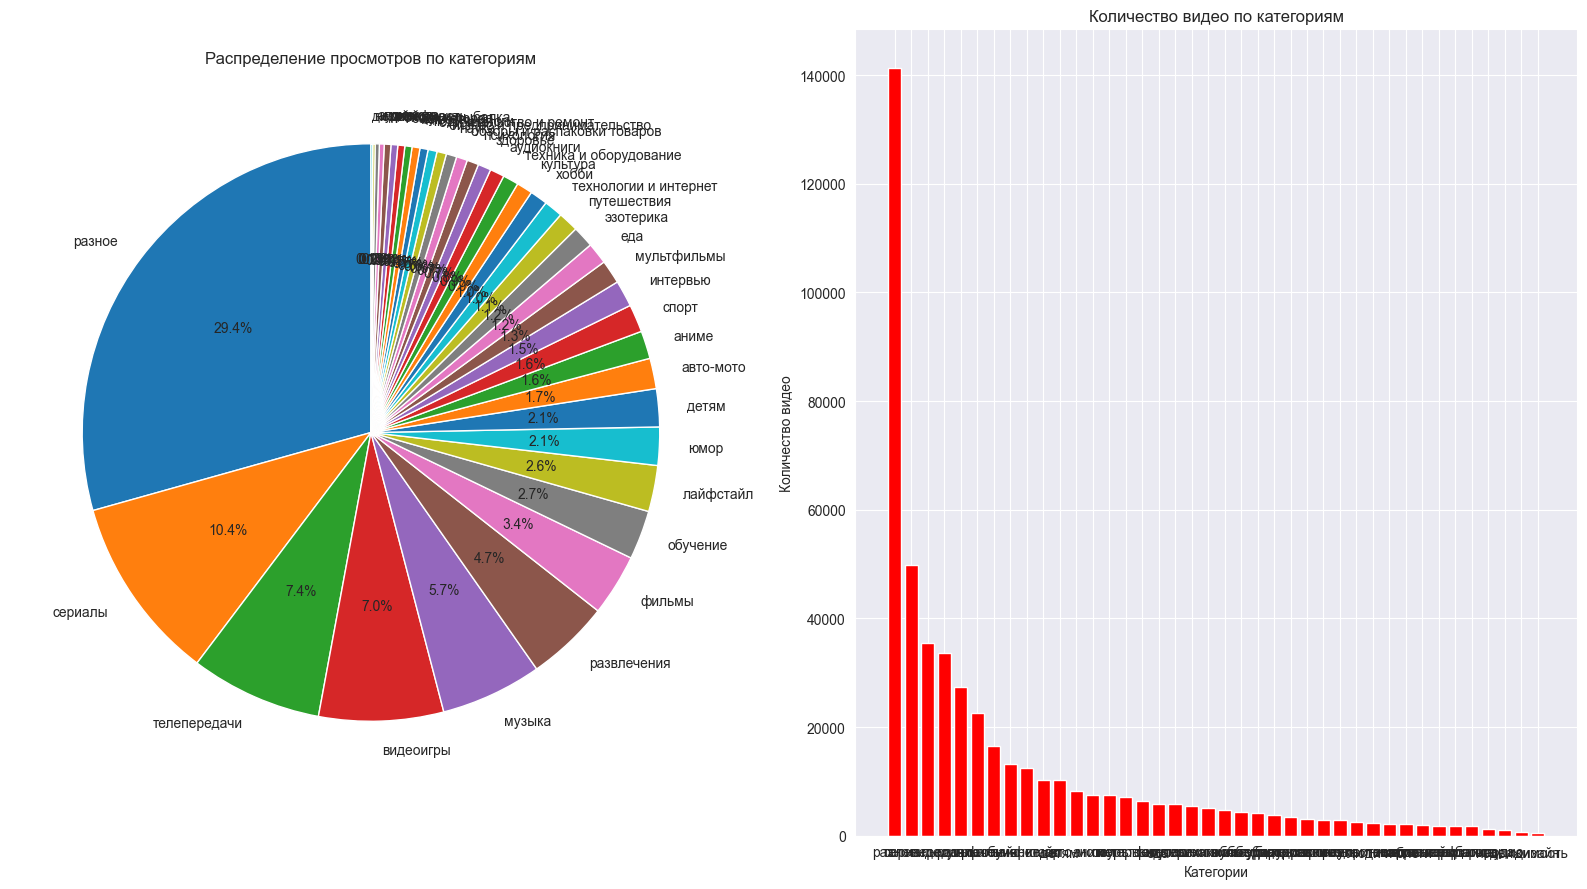

In [40]:
# Круговая диаграмма
plt.figure(figsize=(16, 9))

plt.subplot(1, 2, 1)
plt.pie(distribution_of_cat['count'], labels=distribution_of_cat['category'], autopct='%1.1f%%', startangle=90)
plt.title('Распределение просмотров по категориям')

# Колончатая диаграмма
plt.subplot(1, 2, 2)
plt.bar(distribution_of_cat['category'], distribution_of_cat['count'], color='red')
plt.xlabel('Категории')
plt.ylabel('Количество видео')
plt.title('Количество видео по категориям')

# Показываем диаграммы
plt.tight_layout()
plt.show()

как видим наиболее популярные категории видео - разное, сериалы, телепередачи, видеоигры и т.д.

In [41]:
# Некоторая сводная информация
data_video_info.describe()

rutube_video_id      duration     author_id
count    481480.000000  4.814800e+05  4.814800e+05
mean     240739.500000  1.661327e+06  1.041908e+06
std      138991.448142  2.582759e+06  3.540633e+04
min           0.000000  1.800010e+05  1.000000e+06
25%      120369.750000  3.476500e+05  1.011281e+06
50%      240739.500000  8.162280e+05  1.032170e+06
75%      361109.250000  2.340053e+06  1.065232e+06
max      481479.000000  8.924402e+07  1.125441e+06

### Проверка гипотез и выявление закономерностей в общем датасете событий(соберем в 1 датасет просмотр, информацию о видео и информацию о пользователе)

In [42]:
# собераем общий датасет без перевода параметров к числовым(для удобства)
plus_video_info = pd.merge(not_num_train_events, not_num_video_info, on='rutube_video_id', how='left')
train_all_events = pd.merge(plus_video_info, not_num_train_users, on='viewer_uid', how='left')

# Полученный датасет
 
train_all_events.sample(10)

event_timestamp              region ua_device_type  \
1282871 2024-06-24 13:12:41+03:00              moscow        desktop   
592073  2024-06-11 22:17:12+03:00              moscow     smartphone   
415245  2024-06-08 00:39:20+03:00              moscow     smartphone   
295002  2024-06-06 09:05:45+03:00   sverdlovsk oblast     smartphone   
527531  2024-06-10 22:59:11+03:00      st.-petersburg     smartphone   
301096  2024-06-06 07:45:20+03:00       samara oblast     smartphone   
1381060 2024-06-25 06:56:23+03:00              moscow     smartphone   
982312  2024-06-18 14:23:44+03:00  novosibirsk oblast        desktop   
58246   2024-06-02 01:47:15+03:00              rostov        desktop   
79805   2024-06-02 09:42:58+03:00  khakasiya republic        desktop   

        ua_client_type      ua_os  ua_client_name  total_watchtime  \
1282871        browser  gnu/linux          chrome             2642   
592073      mobile app    android          rutube             2061   
415245         browser    android   chrome mobile               42   
295002      mobile app    android          rutube              880   
527531      mobile app    android          rutube              760   
301096         browser    android  yandex browser             2792   
1381060     mobile app    android          rutube              820   
982312         browser    windows  yandex browser             5242   
58246          browser    windows          chrome             1012   
79805          browser    windows          chrome             4243   

         rutube_video_id  viewer_uid day_of_week  local_time  \
1282871           312104    10208266      Monday          13   
592073            345712    10067890     Tuesday          22   
415245            139550    10844119    Saturday           1   
295002            402723    10165755    Thursday          11   
527531             86159    10020423      Monday          23   
301096            138663    10191868    Thursday           9   
1381060           441245    10161709     Tuesday           7   
982312            382386    10207987     Tuesday          18   
58246             269229    10897817      Sunday           2   
79805             138719    10382647      Sunday          14   

                                                     title      category  \
1282871  «берегись автомобиля!» | фильм из цикла «следс...  телепередачи   
592073                     битва шефов, 3 сезон, 19 выпуск  телепередачи   
415245                       юные архитекторы строят дом !     лайфстайл   
295002   почему армения не сможет жить без россии? — са...  телепередачи   
527531                            врачи, 3 сезон, 4 выпуск  телепередачи   
301096     во все тяжкие  – 2 сезон 7 серия / breaking bad       сериалы   
1381060  воскресное, урожай бананов. манго созрели. 6 н...  сад и огород   
982312   гарри поттер и философский камень (фильм, 2001...        фильмы   
58246    евангелион 21 серия «он осознавал, что все еще...         аниме   
79805           невеста. экстра любовь, 1 сезон, 11 выпуск  телепередачи   

         duration  author_id  age     sex  age_class  
1282871   2645014    1008828   32    male          2  
592073    5429680    1002256   28  female          1  
415245     410412    1012176   38  female          2  
295002    2893416    1009223   38    male          2  
527531    2752040    1002137   34  female          2  
301096    2841729    1093207   34    male          2  
1381060   1019600    1010877   37    male          2  
982312    9139348    1043618   45    male          3  
58246     1761762    1048955   20  female          0  
79805     4414000    1009257   21  female          1

#### Но для начала немного обогатим данные 

In [43]:
# столбец общего времени просмотра видео

columns_to_sum = ['total_watchtime']
other_columns = [col for col in train_all_events.columns if col not in columns_to_sum + ['rutube_video_id', 'viewer_uid']]

agg_dict = {col: 'sum' for col in columns_to_sum}
agg_dict.update({col: 'first' for col in other_columns})

dataset = train_all_events.groupby(['rutube_video_id', 'viewer_uid'], as_index=False).agg(agg_dict)

In [44]:
# столбец с названием периода дня(утро, вечер, день)

# Разделение времени на периоды
def time_of_day(hour):
    if 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'day'
    elif 18 <= hour < 24:
        return 'evening'
    else:
        return 'night'

# Добавление столбца с временным интервалом
train_all_events['time_of_day'] = train_all_events['local_time'].apply(lambda x: time_of_day(x))


In [45]:
# Вывод датасета

train_all_events.sample(10)

event_timestamp              region ua_device_type  \
658869  2024-06-12 15:18:14+03:00              rostov     smartphone   
1393165 2024-06-26 21:18:11+03:00      stavropol kray     smartphone   
506509  2024-06-10 07:17:33+03:00              moscow     smartphone   
387796  2024-06-08 10:38:59+03:00    krasnoyarsk krai        desktop   
1243398 2024-06-23 21:46:58+03:00  tatarstan republic     smartphone   
90286   2024-06-02 18:15:50+03:00   sverdlovsk oblast     smartphone   
1150294 2024-06-21 21:55:18+03:00   sverdlovsk oblast     smartphone   
420578  2024-06-08 22:21:11+03:00              moscow        desktop   
430525  2024-06-09 21:14:28+03:00       moscow oblast        desktop   
1036322 2024-06-19 13:51:58+03:00      krasnodar krai     smartphone   

        ua_client_type    ua_os  ua_client_name  total_watchtime  \
658869      mobile app  android          rutube             6120   
1393165     mobile app  android          rutube               39   
506509         browser  android   chrome mobile               53   
387796         browser  windows  yandex browser              482   
1243398     mobile app  android          rutube             2530   
90286       mobile app  android          rutube             1722   
1150294        browser  android   chrome mobile             3682   
420578         browser  windows          chrome             2580   
430525         browser  windows          chrome             6635   
1036322     mobile app  android          rutube             2391   

         rutube_video_id  viewer_uid day_of_week  local_time  \
658869            117988    10317001   Wednesday          15   
1393165           360461    10395753   Wednesday          21   
506509            148871    10670188      Monday           7   
387796            386591    10189155    Saturday          15   
1243398           134349    10074524      Sunday          22   
90286             256042    10015028      Sunday          20   
1150294           477884    10358228      Friday          24   
420578            123107    10092232    Saturday          22   
430525             95149    10068651      Sunday          21   
1036322            97997    10017930   Wednesday          14   

                                                     title      category  \
658869                         иван кондаков про заграницу          юмор   
1393165  с приветом по планетам – 2 сезон 16 серия «лег...       сериалы   
506509                 лучший отель питера за свои деньги?   путешествия   
387796                        вот, как россия ответит сша!        разное   
1243398              выжить в дубае. возвращение, 2 выпуск  телепередачи   
90286      во все тяжкие  – 1 сезон 1 серия / breaking bad       сериалы   
1150294  сериал фоллаут - 1 сезон 2 серия (русская озву...       сериалы   
420578               отчаянные домохозяйки 7 сезон 4 серия       сериалы   
430525                     мой ужасный сосед (фильм, 2022)        фильмы   
1036322  не золотое дно. мужское / женское. выпуск от 1...  телепередачи   

         duration  author_id  age     sex  age_class time_of_day  
658869    6127720    1010000   42    male          3         day  
1393165   1272640    1073053   36    male          2     evening  
506509     319150    1012111   37    male          2     morning  
387796     511520    1009406   34    male          2         day  
1243398   6780760    1009257   38  female          2     evening  
90286     3486593    1093207   26  female          1     evening  
1150294   3754542    1036095   38    male          2       night  
420578    2610720    1089828   22  female          1     evening  
430525    7588003    1035931   43  female          3     evening  
1036322   2402518    1009219   30  female          1         day

## Рассмотрим зависимость между возрастными группами и категориями видео (гипотеза: зависимость возраста от категорий контента)

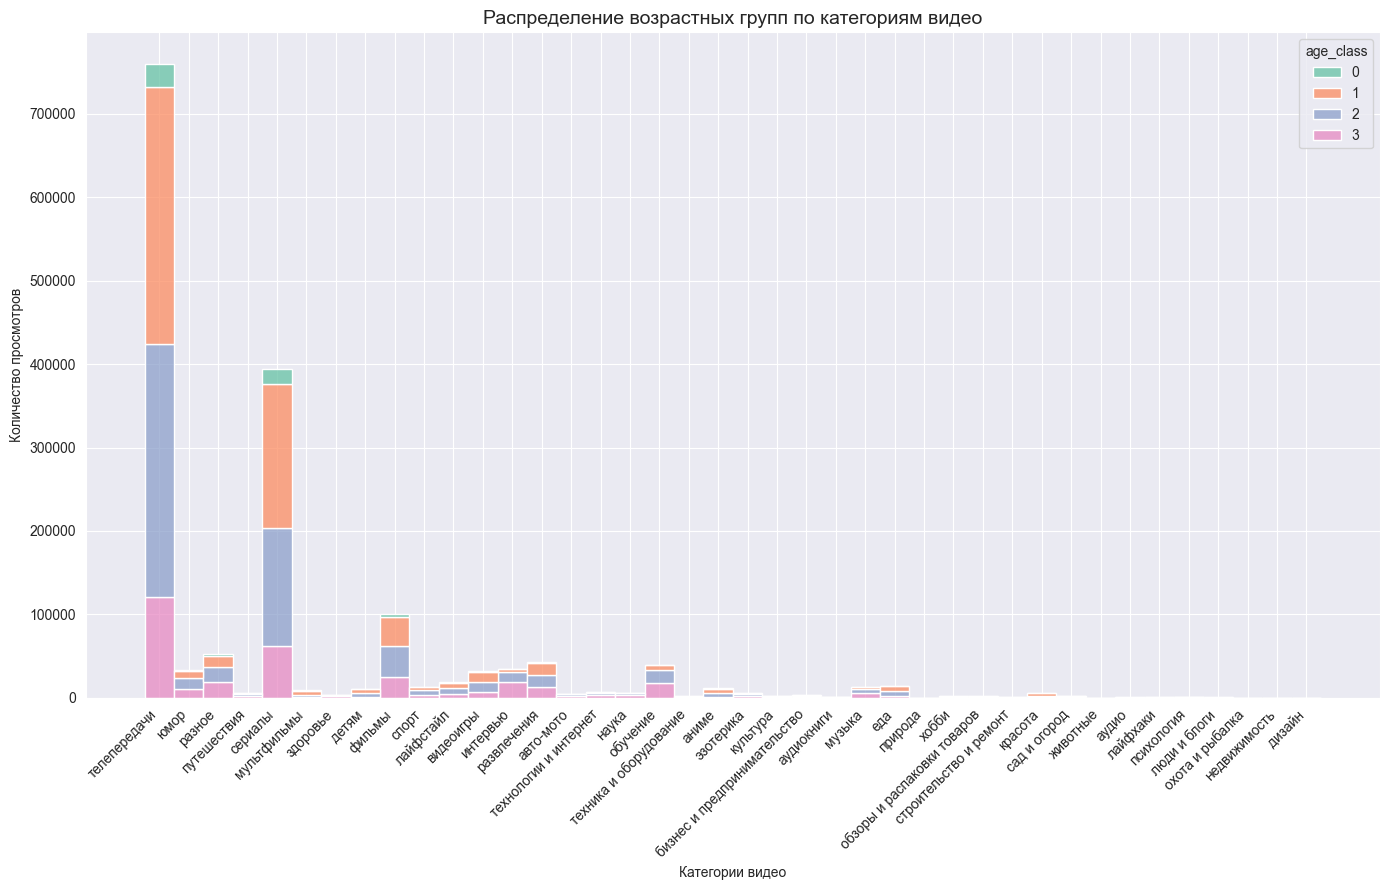

In [46]:
plt.figure(figsize=(14, 9))
sns.histplot(data=train_all_events, x='category', hue='age_class', multiple='stack', palette='Set2')

# Настраиваем заголовок и оси
plt.title('Распределение возрастных групп по категориям видео', fontsize=14)
plt.xlabel('Категории видео')
plt.ylabel('Количество просмотров')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


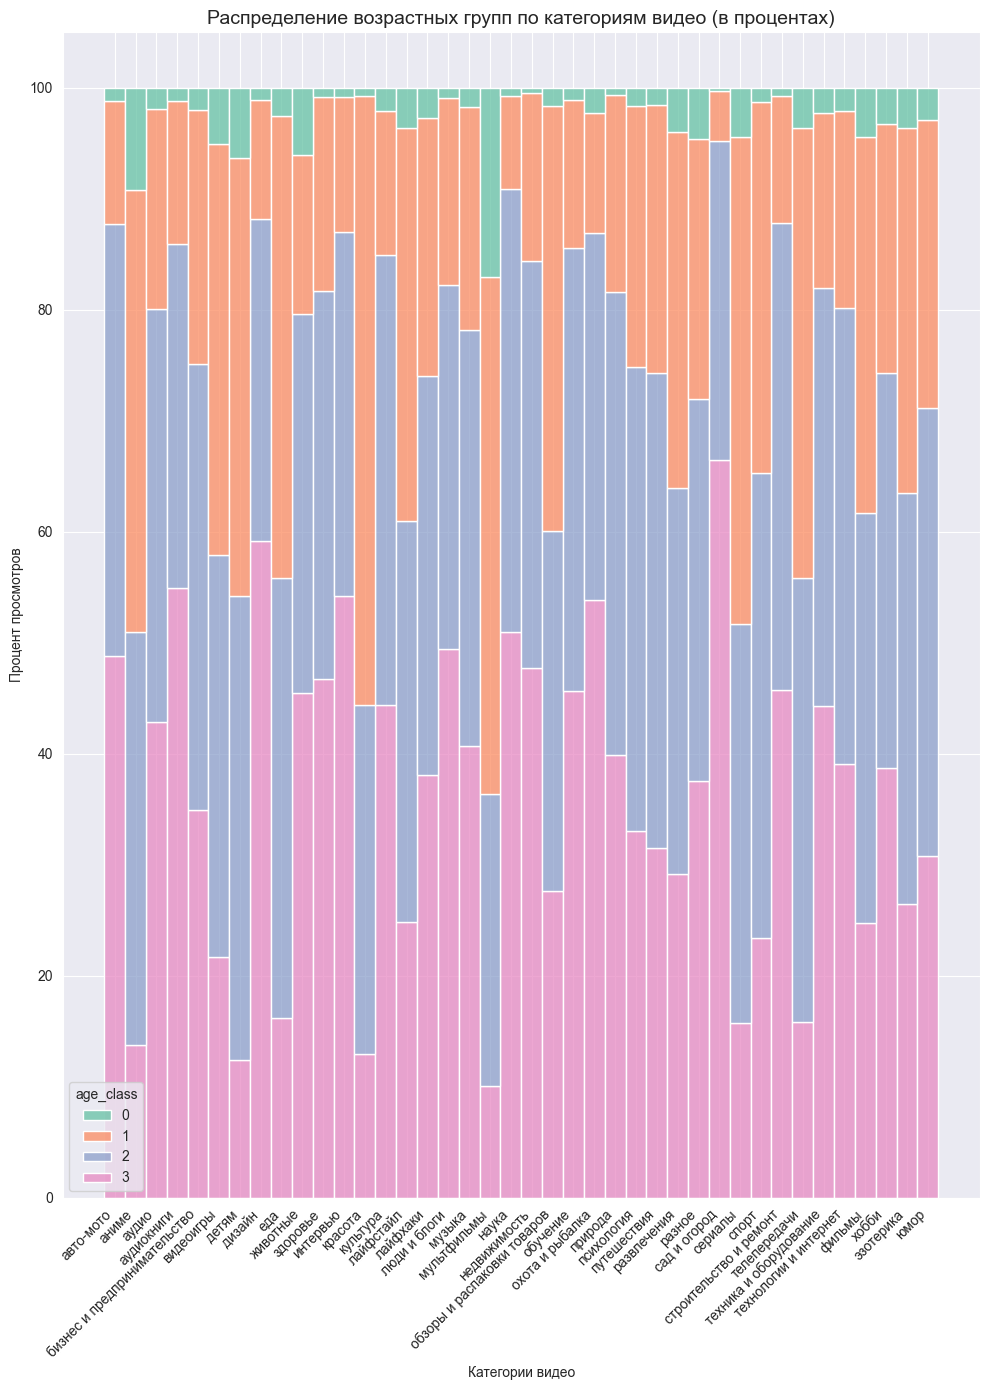

In [47]:
# Подсчет количества просмотров по категориям и возрастным группам
counts = train_all_events.groupby(['category', 'age_class']).size().reset_index(name='count')

# Рассчитываем общее количество просмотров по каждой категории
total_counts_per_category = counts.groupby('category')['count'].transform('sum')

# Рассчитываем проценты
counts['percentage'] = counts['count'] / total_counts_per_category * 100

# Построение гистограммы
plt.figure(figsize=(10, 14))
sns.histplot(data=counts, x='category', hue='age_class', weights='percentage', multiple='stack', palette='Set2')

# Настраиваем заголовок и оси
plt.title('Распределение возрастных групп по категориям видео (в процентах)', fontsize=14)
plt.xlabel('Категории видео')
plt.ylabel('Процент просмотров')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\capy\AppData\Local\Temp\ipykernel_12636\2974914847.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_all_events, x='category', y='age', palette='Set3')


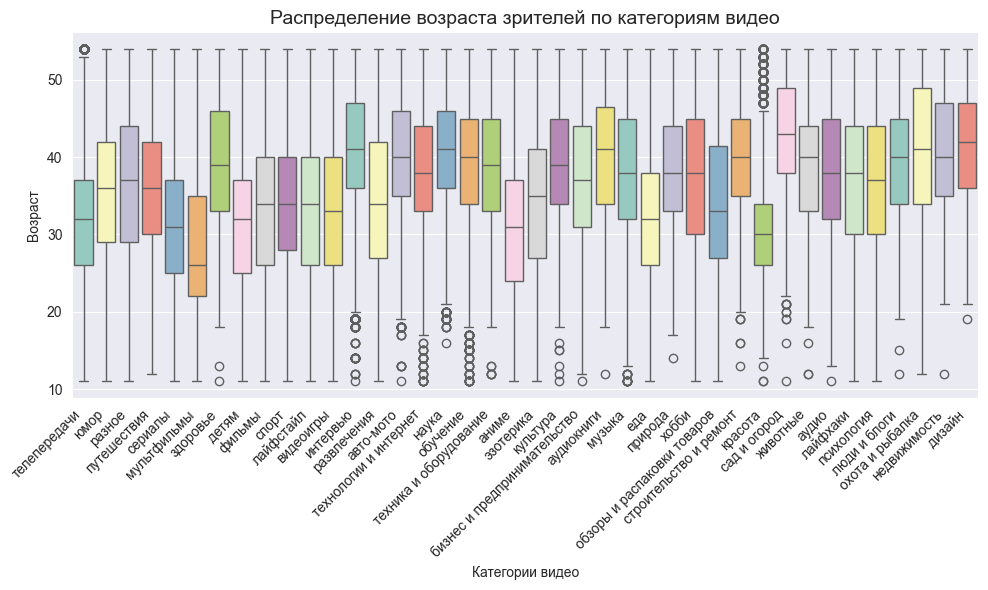

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_all_events, x='category', y='age', palette='Set3')

# Настраиваем заголовок и оси
plt.title('Распределение возраста зрителей по категориям видео', fontsize=14)
plt.xlabel('Категории видео')
plt.ylabel('Возраст')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


как видим у нас большое количество выбросов на уровне до 20 лет, но считать это выбросами не получится, ибо у нас просто мало записей для данного возраста, из-за этого машина считает их выбросами

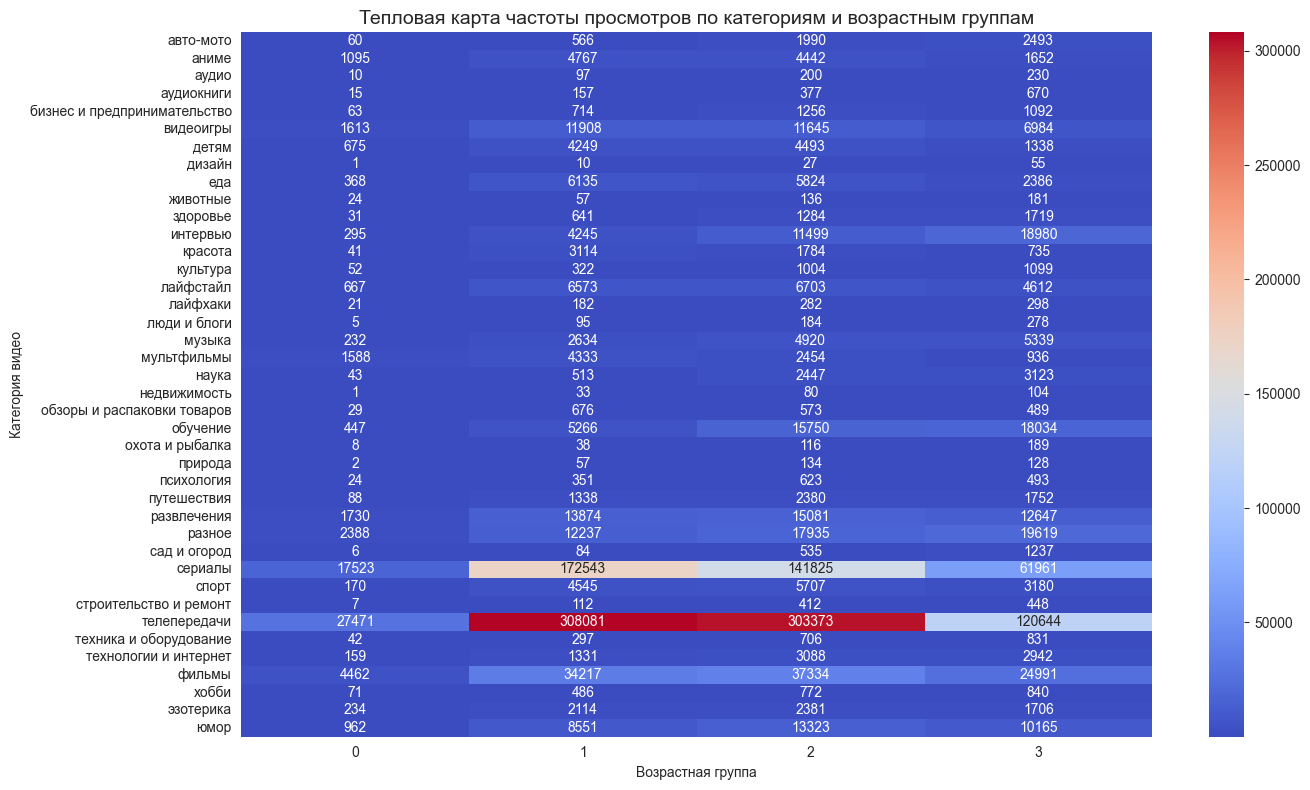

In [49]:
# Создаем сводную таблицу
pivot_table = pd.pivot_table(train_all_events, values='viewer_uid', index='category', columns='age_class', aggfunc='count')

# Построение тепловой карты
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='g')

# Настраиваем заголовок и оси
plt.title('Тепловая карта частоты просмотров по категориям и возрастным группам', fontsize=14)
plt.xlabel('Возрастная группа')
plt.ylabel('Категория видео')

plt.tight_layout()
plt.show()


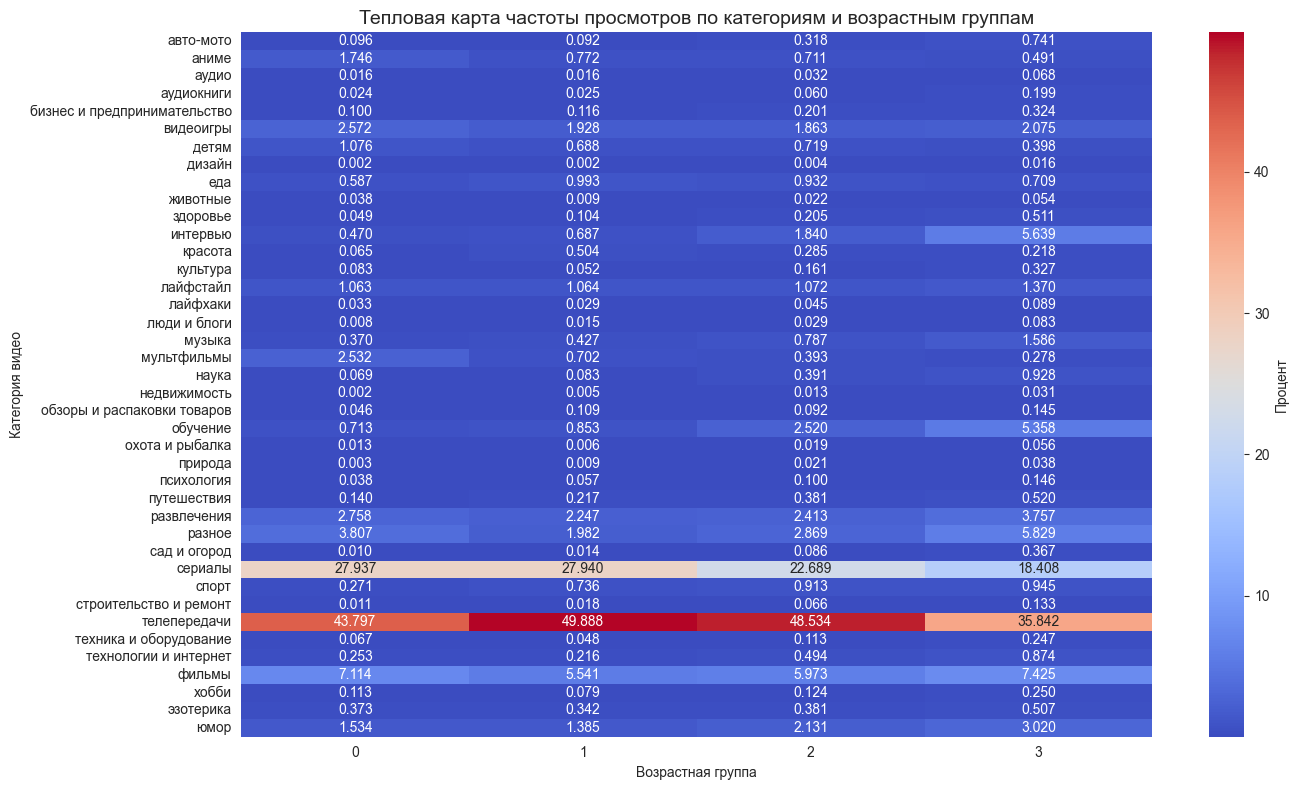

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Создаем сводную таблицу с количеством просмотров
pivot_table = pd.pivot_table(
    train_all_events,
    values='viewer_uid',
    index='category',
    columns='age_class',
    aggfunc='count',
    fill_value=0
)

# Рассчитываем общее количество просмотров по каждой возрастной группе
total_views_per_age_class = pivot_table.sum(axis=0)

# Рассчитываем проценты по каждой категории относительно общего количества просмотров по возрастной группе
pivot_table_percentage = pivot_table.div(total_views_per_age_class, axis=1) * 100

# Построение тепловой карты
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table_percentage, annot=True, cmap='coolwarm', fmt='.3f', cbar_kws={'label': 'Процент'})

# Настраиваем заголовок и оси
plt.title('Тепловая карта частоты просмотров по категориям и возрастным группам', fontsize=14)
plt.xlabel('Возрастная группа')
plt.ylabel('Категория видео')

plt.tight_layout()
plt.show()

Теперь посмотрим зависимость не от возрастной группы, а от конкретного возраста

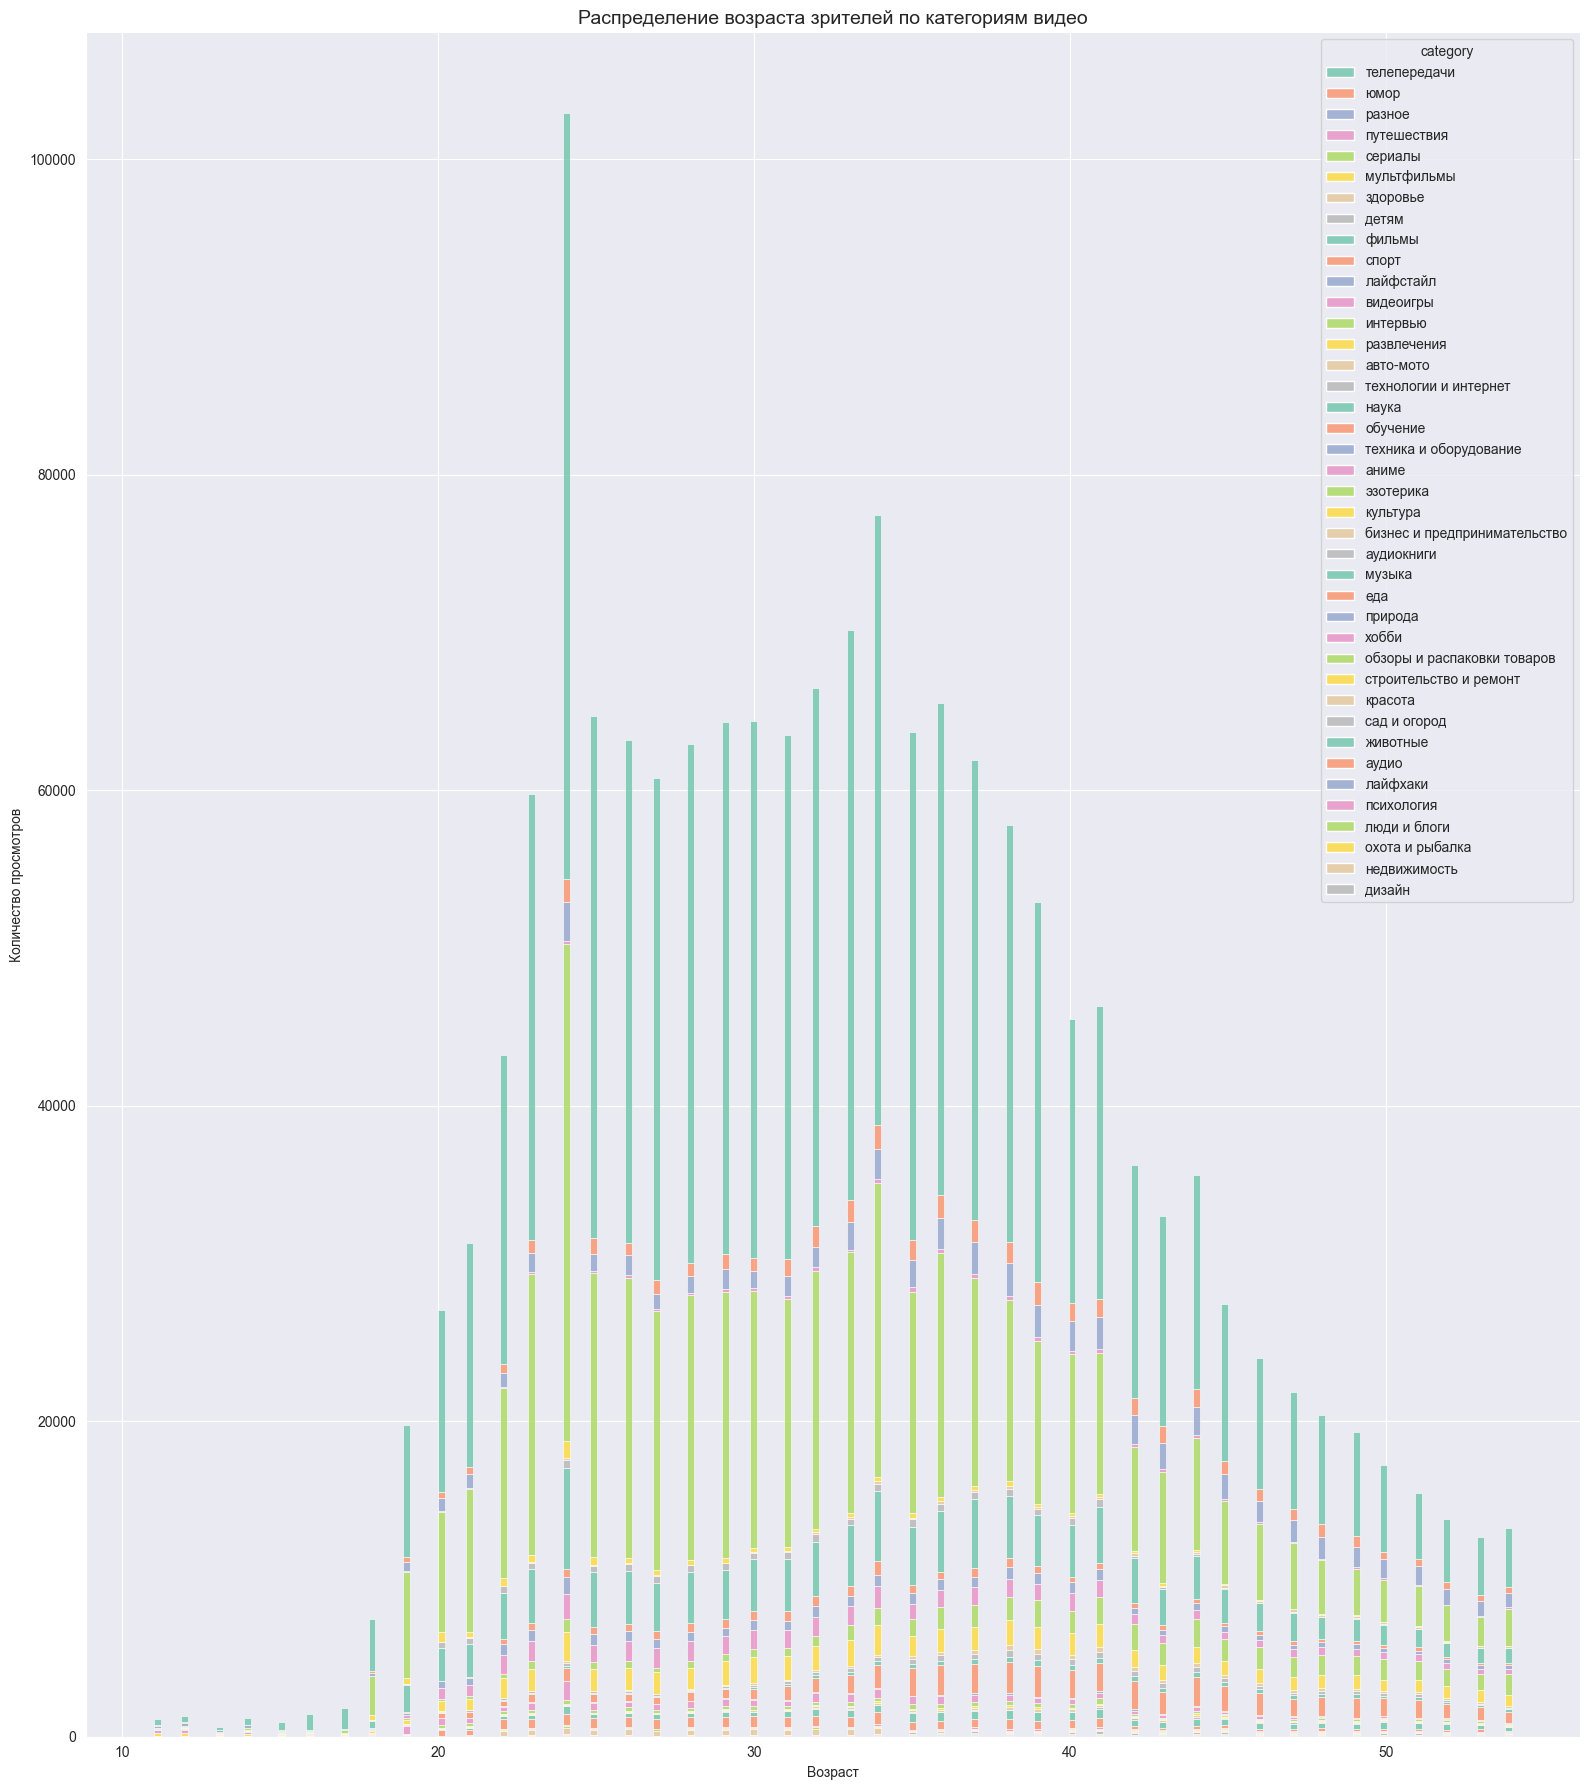

In [51]:
plt.figure(figsize=(16, 18))
sns.histplot(data=train_all_events, x='age', hue='category', multiple='stack', palette='Set2')

# Настраиваем заголовок и оси
plt.title('Распределение возраста зрителей по категориям видео', fontsize=14)
plt.xlabel('Возраст')
plt.ylabel('Количество просмотров')

plt.tight_layout()
plt.show()


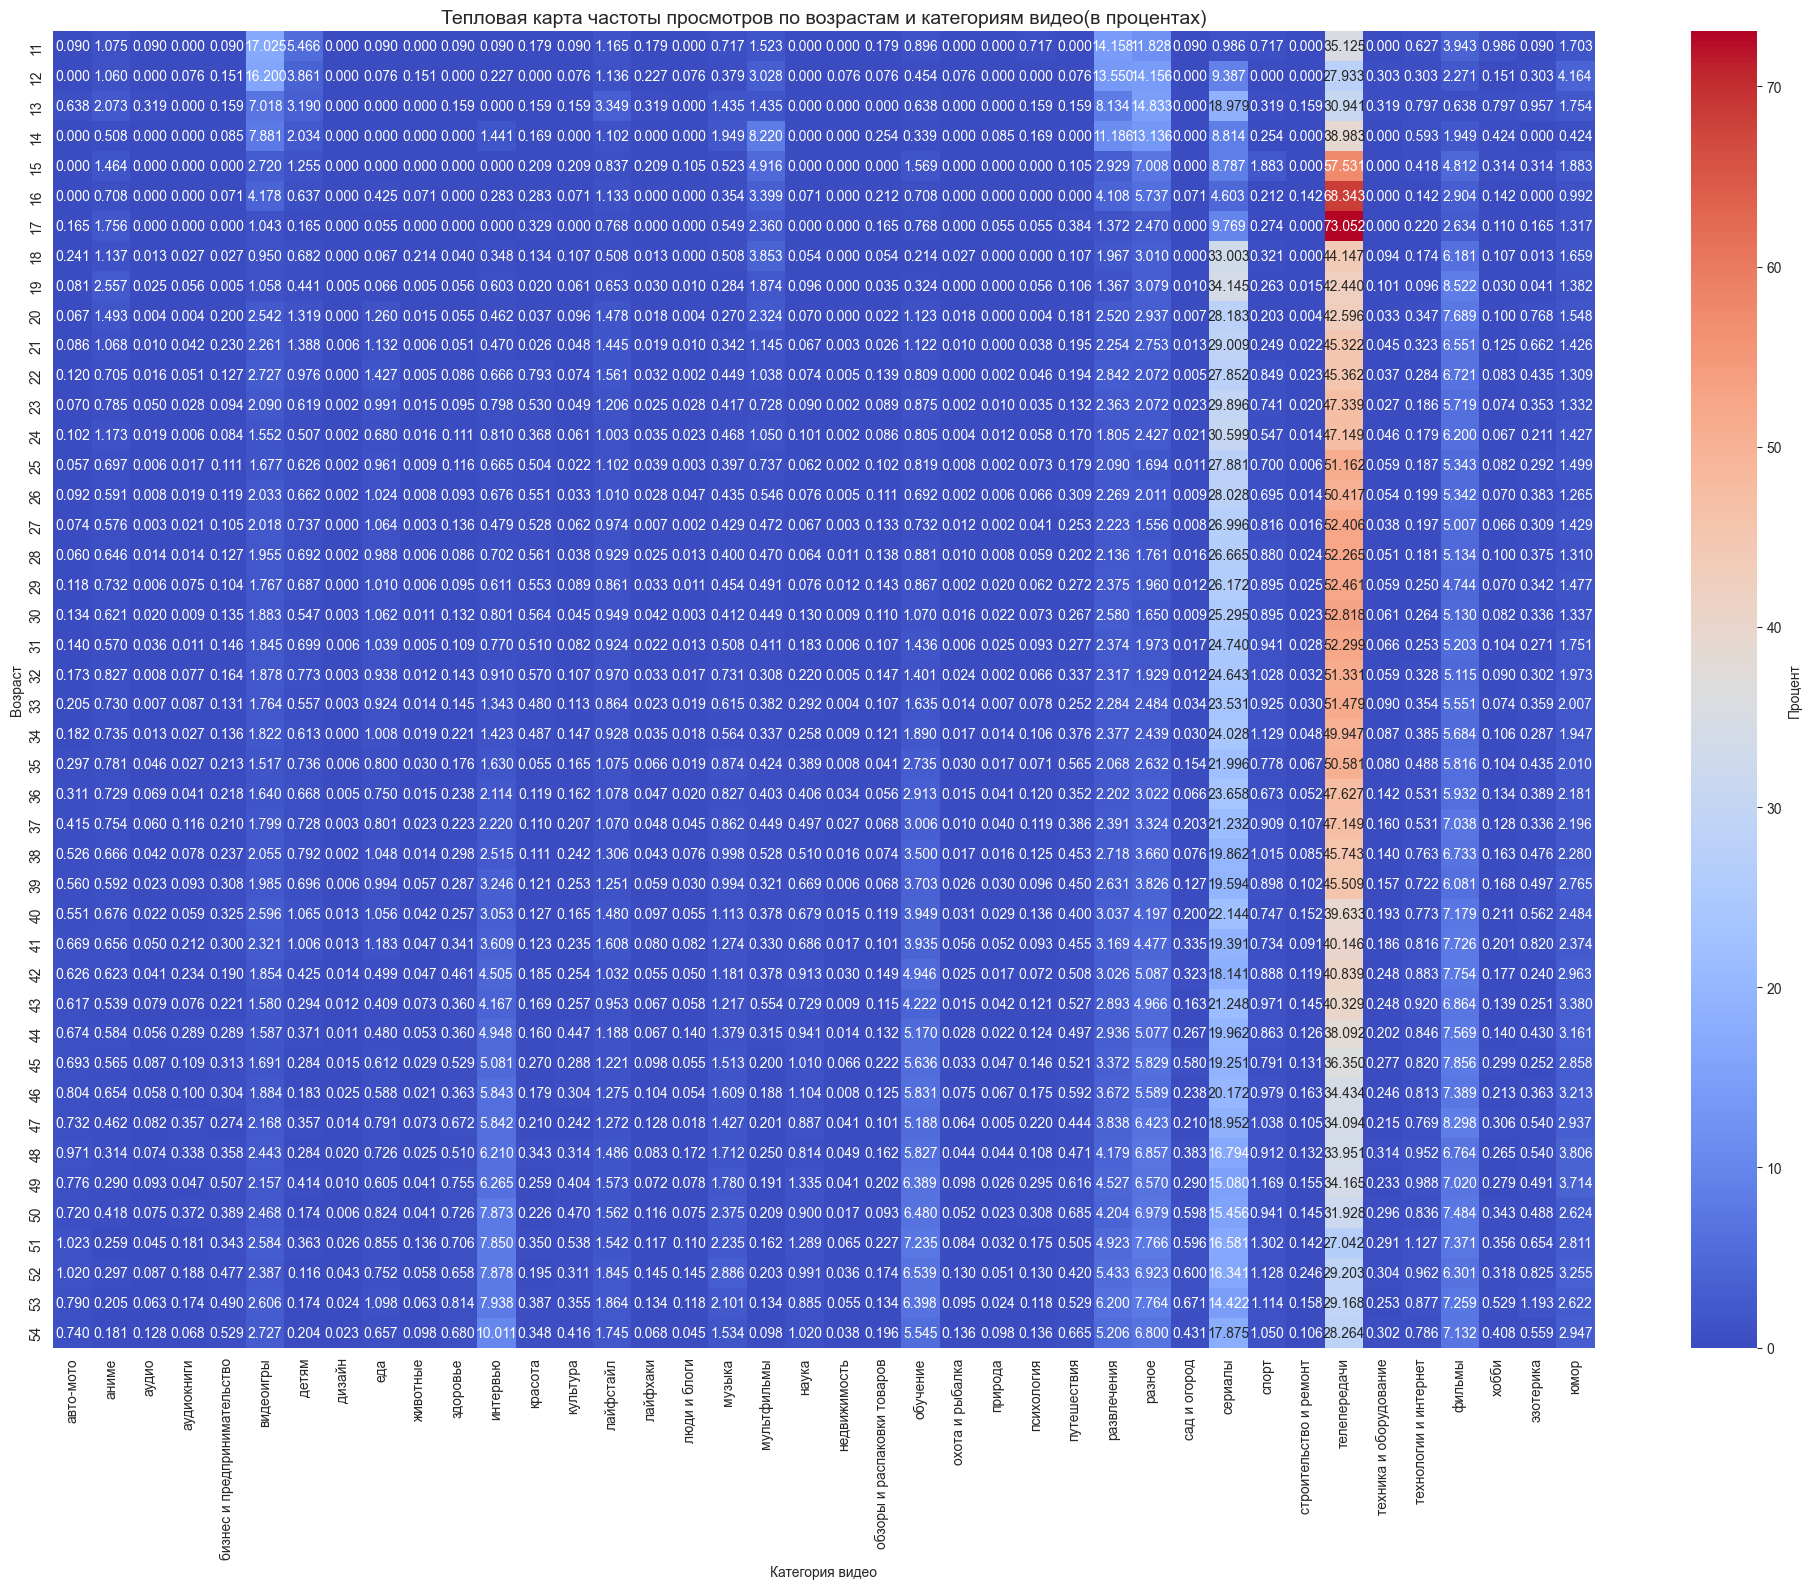

In [52]:
# Создаем сводную таблицу с количеством просмотров
pivot_table = pd.pivot_table(
    train_all_events,
    values='viewer_uid',
    index='age',  # Изменили индекс на возраст
    columns='category',
    aggfunc='count',
    fill_value=0
)

# Рассчитываем общее количество просмотров по каждой возрастной группе
total_views_per_age = pivot_table.sum(axis=1)

# Рассчитываем проценты по каждой категории относительно общего количества просмотров по возрасту
pivot_table_percentage = pivot_table.div(total_views_per_age, axis=0) * 100

# Построение тепловой карты
plt.figure(figsize=(20, 16))
sns.heatmap(pivot_table_percentage, annot=True, cmap='coolwarm', fmt='.3f', cbar_kws={'label': 'Процент'})

# Настраиваем заголовок и оси
plt.title('Тепловая карта частоты просмотров по возрастам и категориям видео(в процентах)', fontsize=14)
plt.xlabel('Категория видео')
plt.ylabel('Возраст')

plt.tight_layout()
plt.show()


Из приведенного выше можно сделать вывод, что наиболее популярные категории видео для всех возрастов это сериалы и телепередачи, причем интерес к сериалам начинает падать после возраста на уровне лет 20-22, а интерес к телеперадачам растет и позже постепенно падает, достигая пика на уровне 30 лет. Все что ниже 18 лет сильно отличается от остальных данных, это связанно с малым количество представителей людей до 18 их крайне мало, есть преположение о том, что люди до 18 лет указывают не настоящий возраст чтобы не иметь ограничений по контенту или у них возникают проблем при регистрации, потому - что видна явная пропасть между пользователями меньше 18 и пользователями начиная от 18.
К таким категориям как интервью и обучение и в некоторой степени к категории юмор с возрастом интерес наоборот постепенно растет. Видеоигры наиболее популярны у юной аудитории, как и развлечения и разное, но также интерес к этим категориям постепенно растет с возрастом. Фильмы достаточно популярны среди всех возрастных категорий, другие категории не так популярны и находтся в некотором балансе.

C:\Users\capy\AppData\Local\Temp\ipykernel_12636\4006636508.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_counts.index, x=category_counts.values, palette='viridis')


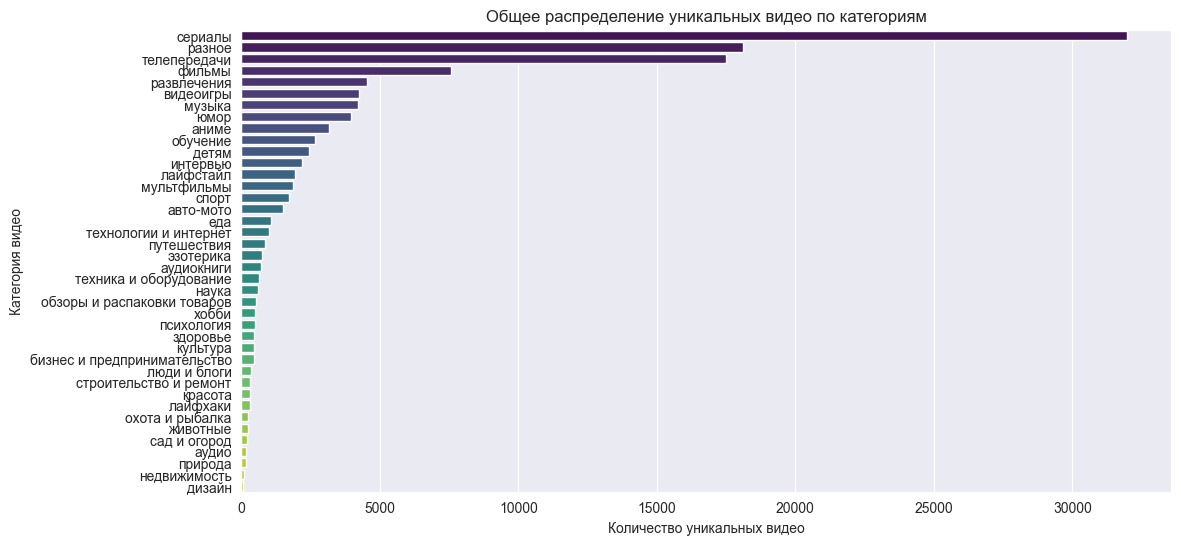

In [53]:
# 1. Уникальные видео в каждой категории
unique_videos_per_category = train_all_events.drop_duplicates(subset=['rutube_video_id', 'category'])

# 2. Подсчет количества уникальных видео по категориям
category_counts = unique_videos_per_category['category'].value_counts()

# 3. Построение графика
plt.figure(figsize=(12, 6))
sns.barplot(y=category_counts.index, x=category_counts.values, palette='viridis')
plt.title('Общее распределение уникальных видео по категориям')
plt.xlabel('Количество уникальных видео')
plt.ylabel('Категория видео')
plt.show()


В дополнение к сказанному выше можно сказать что наиболее популярны (в большинстве случаев) категории видео, которых больше всего на площадке.

### Рассмотрим зависимость пола от категорий видео(гипотеза: от пола зависят просматриваемые категории)

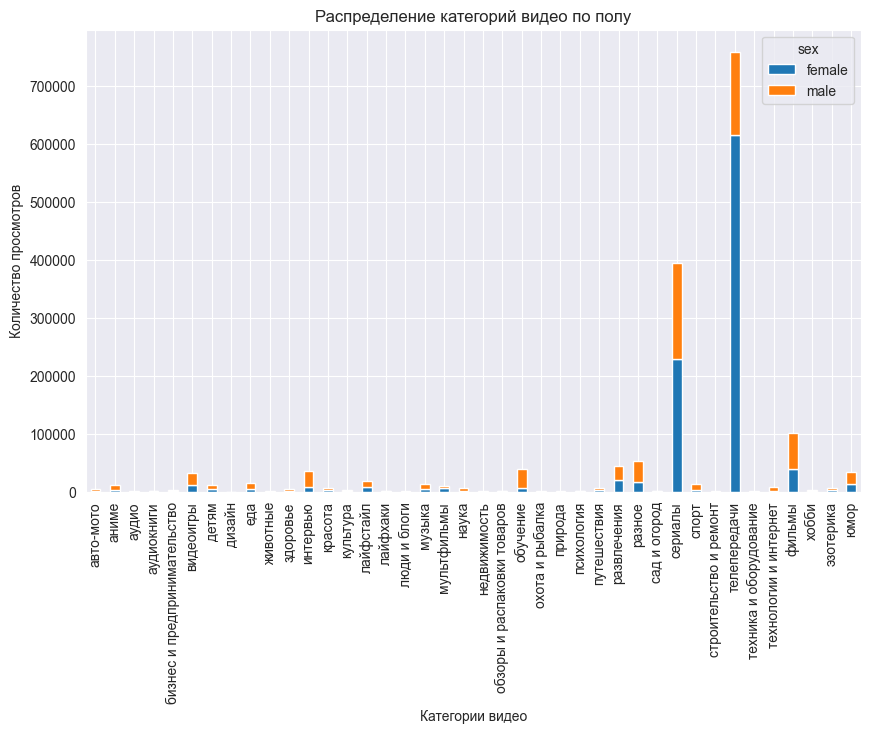

Хи-квадрат: 305002.26947003824, p-value: 0.0
Между полом и категорией видео есть статистически значимая зависимость.


In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Подсчет количества просмотров по категориям для каждого пола
category_sex_counts = train_all_events.groupby(['category', 'sex']).size().unstack().fillna(0)

# Построение распределения просмотров по категориям и полу
category_sex_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Распределение категорий видео по полу')
plt.ylabel('Количество просмотров')
plt.xlabel('Категории видео')
plt.show()

# Пропорции просмотров для мужчин и женщин в каждой категории
category_sex_props = category_sex_counts.div(category_sex_counts.sum(axis=1), axis=0)

# Тестирование гипотезы о взаимосвязи пола и категории видео с использованием хи-квадрат теста
chi2, p, dof, expected = chi2_contingency(category_sex_counts)

print(f'Хи-квадрат: {chi2}, p-value: {p}')

if p < 0.05:
    print("Между полом и категорией видео есть статистически значимая зависимость.")
else:
    print("Статистически значимая зависимость не обнаружена.")


Как показывает тест значима зависимость между полом и категорией видео присутствует

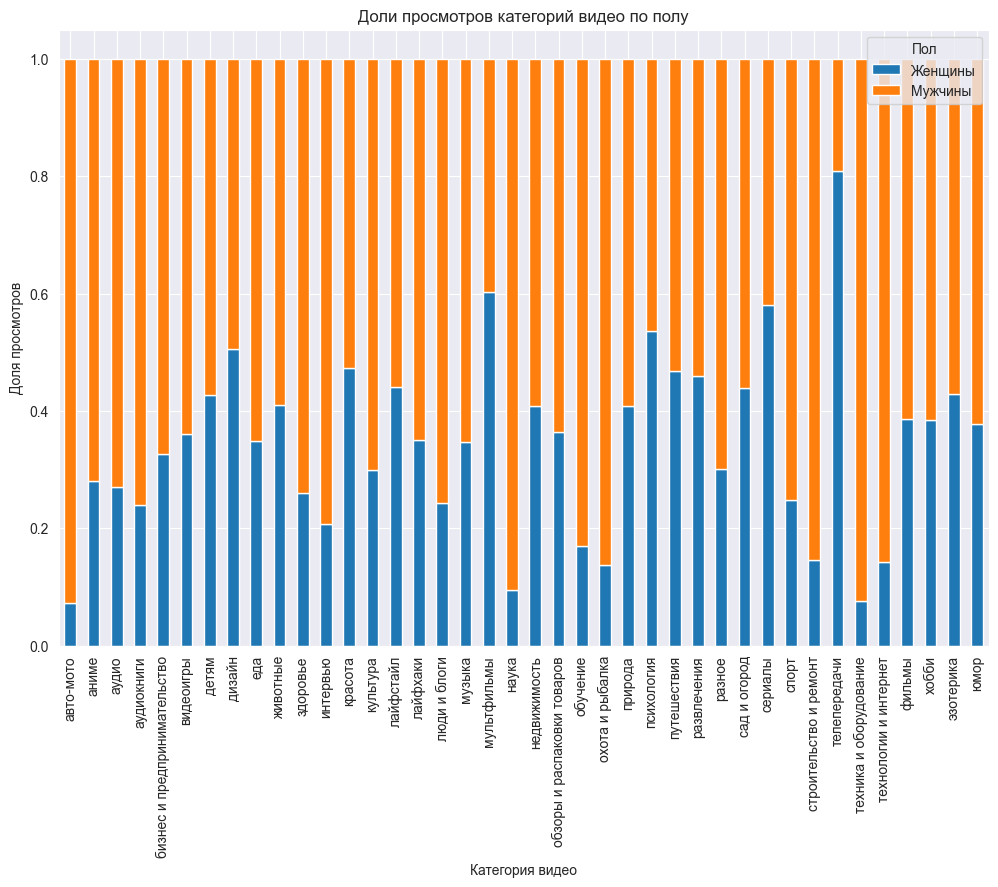

In [55]:
# Пропорции просмотров для мужчин и женщин в каждой категории
category_sex_props.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Доли просмотров категорий видео по полу')
plt.ylabel('Доля просмотров')
plt.xlabel('Категория видео')
plt.legend(['Женщины', 'Мужчины'], title='Пол')
plt.show()


Как видим превосходящее большинство категорий в особенности авто-мото, техника и оборудование наука в больше мере смотрится мужчинами, но наиболее популярные категории такие как сериалы и телепередачи в основном просматриваются женщинами

## Посмотрим зависимость между возрастом и устройством

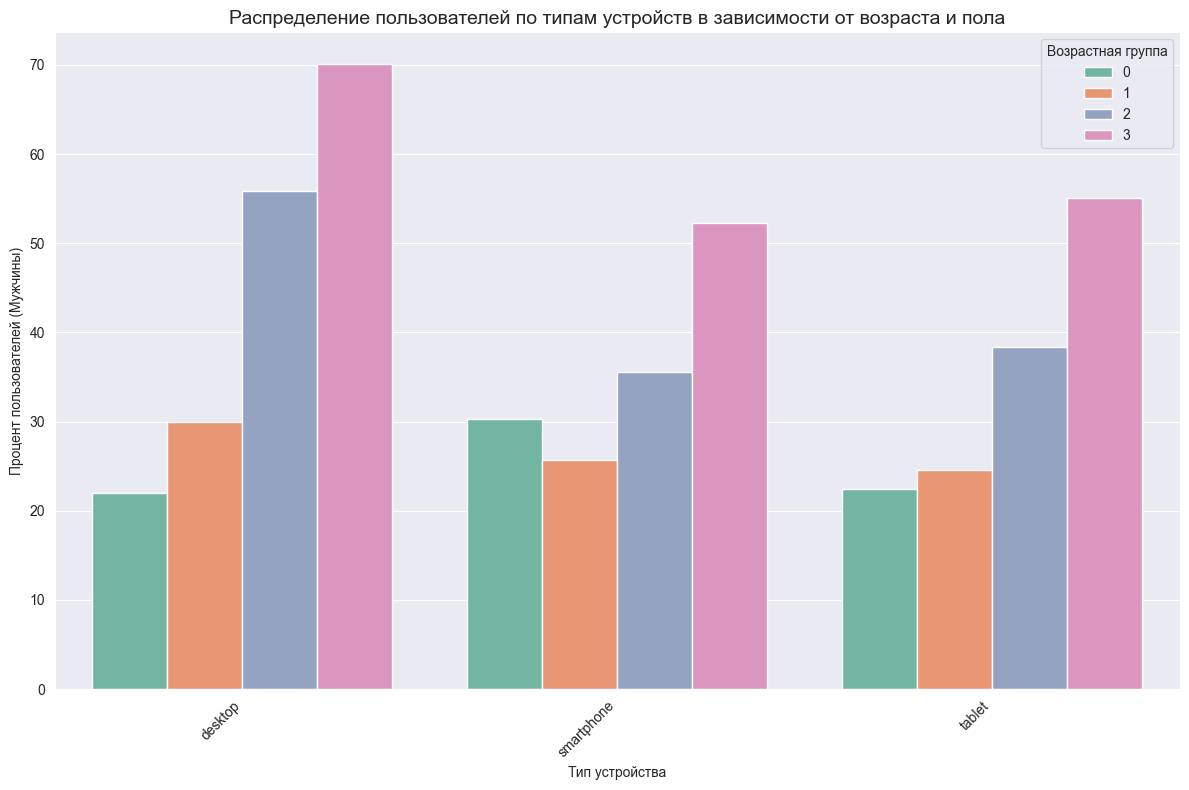

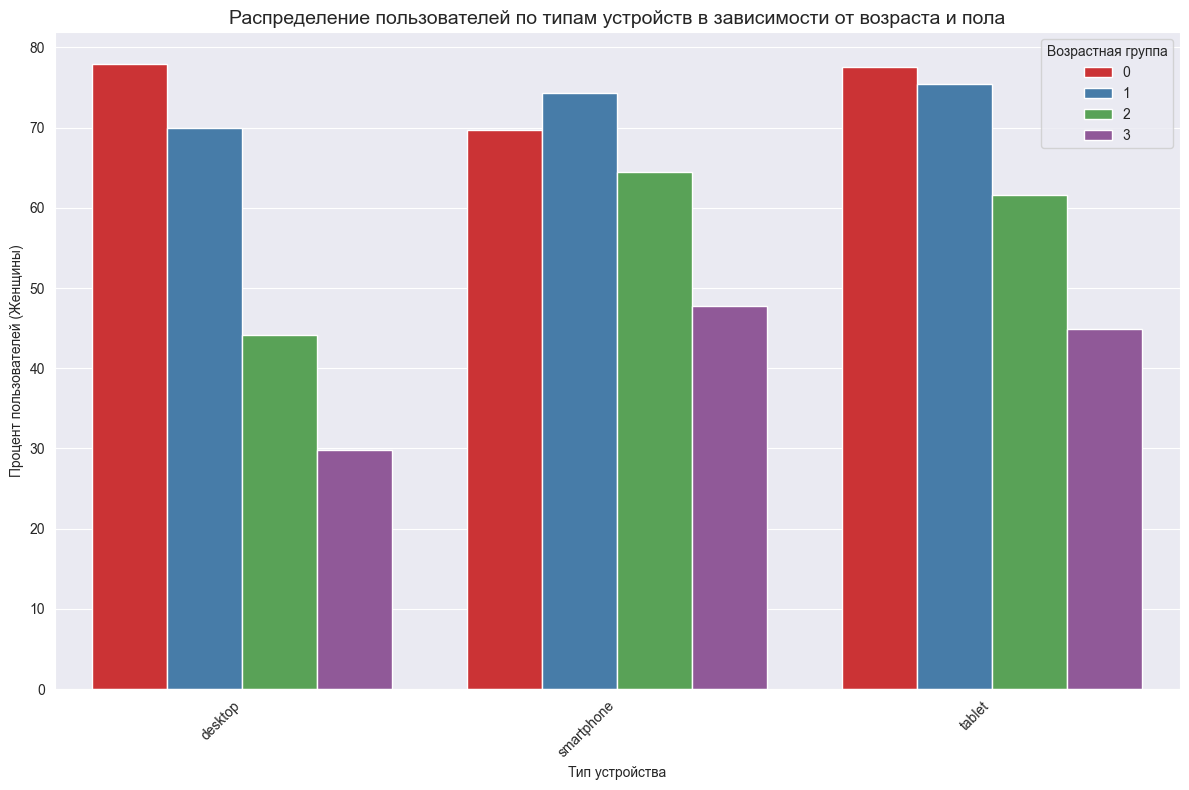

In [56]:
# Создаем сводную таблицу с количеством пользователей по типам устройств, возрасту и полу
pivot_table_device = pd.pivot_table(
    train_all_events,
    values='viewer_uid',
    index=['ua_device_type', 'age_class'],
    columns='sex',
    aggfunc='count',
    fill_value=0
)

# Рассчитываем общее количество пользователей по типам устройств
pivot_table_device['Total'] = pivot_table_device.sum(axis=1)

# Рассчитываем проценты пользователей по полу для каждого типа устройства
pivot_table_device_percentage = pivot_table_device.div(pivot_table_device['Total'], axis=0) * 100

# Сброс индексов для удобства
pivot_table_device_percentage = pivot_table_device_percentage.reset_index()

# Визуализация результатов
plt.figure(figsize=(12, 8))
sns.barplot(data=pivot_table_device_percentage, x='ua_device_type', y='male', hue='age_class', palette='Set2')

# Настраиваем заголовок и оси
plt.title('Распределение пользователей по типам устройств в зависимости от возраста и пола', fontsize=14)
plt.xlabel('Тип устройства')
plt.ylabel('Процент пользователей (Мужчины)')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Возрастная группа')
plt.show()

# Повторяем для женщин
plt.figure(figsize=(12, 8))
sns.barplot(data=pivot_table_device_percentage, x='ua_device_type', y='female', hue='age_class', palette='Set1')

# Настраиваем заголовок и оси
plt.title('Распределение пользователей по типам устройств в зависимости от возраста и пола', fontsize=14)
plt.xlabel('Тип устройства')
plt.ylabel('Процент пользователей (Женщины)')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Возрастная группа')
plt.show()


C:\Users\capy\AppData\Local\Temp\ipykernel_12636\3419261172.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pivot_table_age_gender, x='age_class', y='male', palette='Blues')


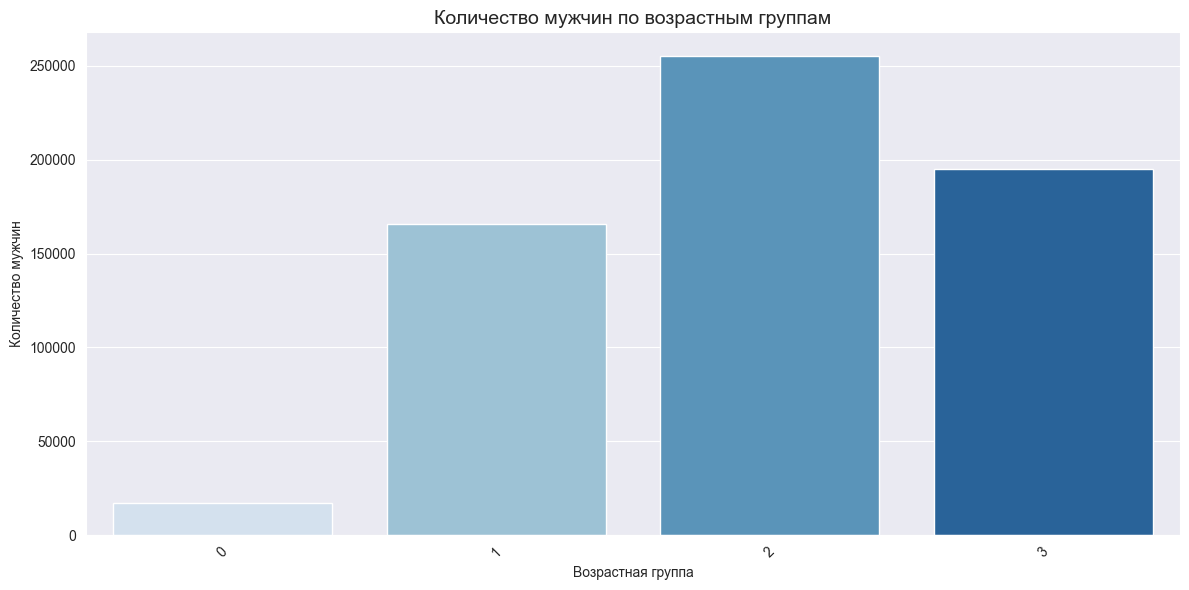

C:\Users\capy\AppData\Local\Temp\ipykernel_12636\3419261172.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pivot_table_age_gender, x='age_class', y='female', palette='Reds')


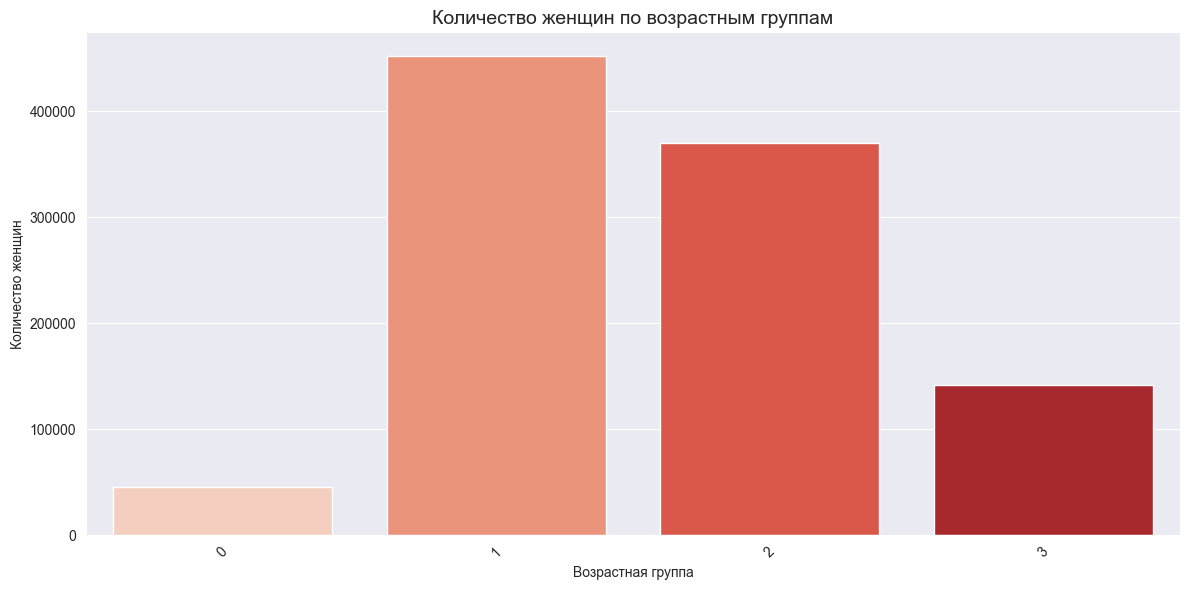

In [57]:
# Создаем сводную таблицу с количеством пользователей по возрастным группам и полу
pivot_table_age_gender = pd.pivot_table(
    train_all_events,
    values='viewer_uid',
    index='age_class',
    columns='sex',
    aggfunc='count',
    fill_value=0
)

# Сброс индексов для удобства
pivot_table_age_gender = pivot_table_age_gender.reset_index()

# Визуализация распределения мужчин
plt.figure(figsize=(12, 6))
sns.barplot(data=pivot_table_age_gender, x='age_class', y='male', palette='Blues')

# Настраиваем заголовок и оси
plt.title('Количество мужчин по возрастным группам', fontsize=14)
plt.xlabel('Возрастная группа')
plt.ylabel('Количество мужчин')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Визуализация распределения женщин
plt.figure(figsize=(12, 6))
sns.barplot(data=pivot_table_age_gender, x='age_class', y='female', palette='Reds')

# Настраиваем заголовок и оси
plt.title('Количество женщин по возрастным группам', fontsize=14)
plt.xlabel('Возрастная группа')
plt.ylabel('Количество женщин')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Если сопоставить количество пользователей и процент мужчин и женщин смотрящих с разных устройств не зависит от типа устройства, существует некоторый баланс полов.

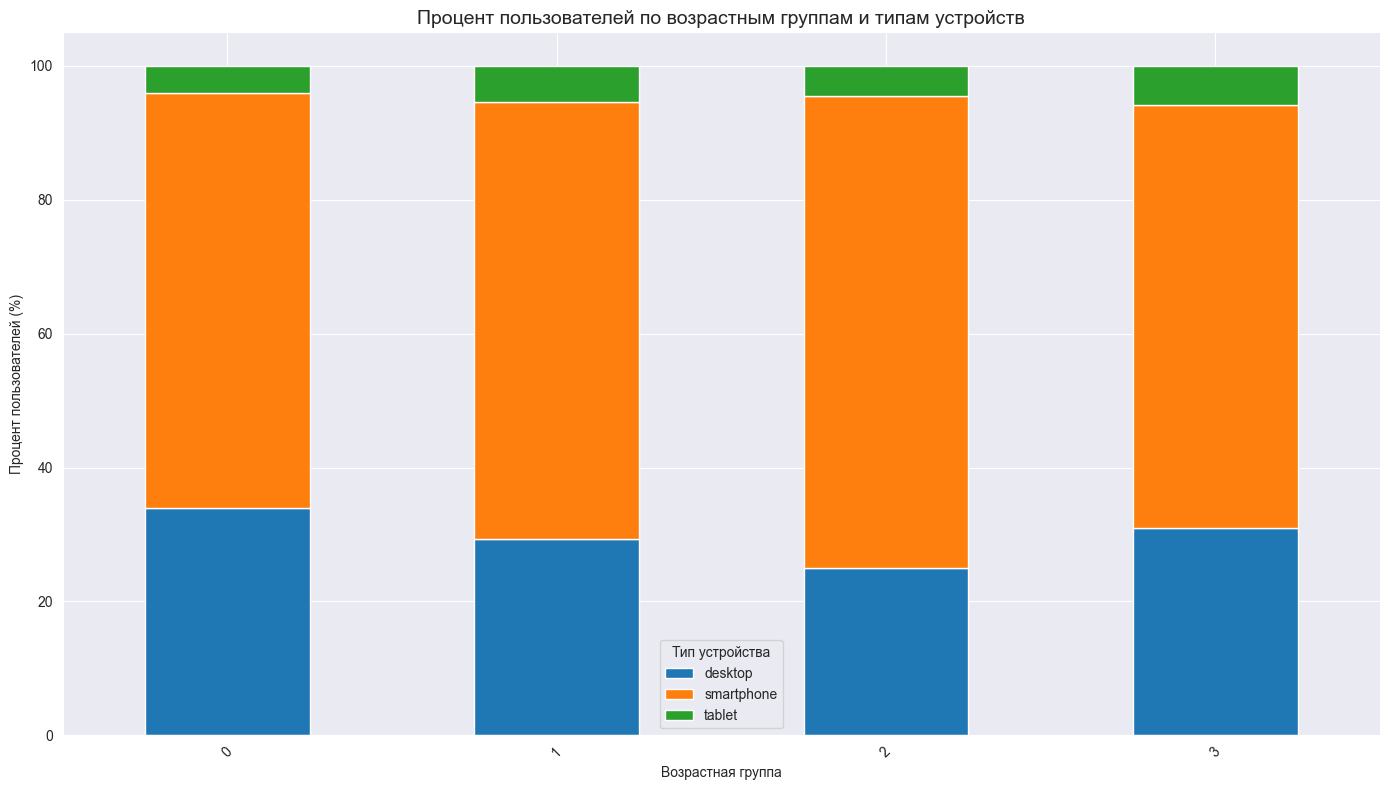

In [58]:
# Создаем сводную таблицу с количеством пользователей по типам устройств и возрастным группам
pivot_table_device_age = pd.pivot_table(
    train_all_events,
    values='viewer_uid',
    index='age_class',
    columns='ua_device_type',
    aggfunc='count',
    fill_value=0
)

# Рассчитываем общее количество пользователей в каждой возрастной группе
total_users_per_age_class = pivot_table_device_age.sum(axis=1)

# Рассчитываем проценты по каждому типу устройства относительно общего количества пользователей в возрастной группе
pivot_table_percentage = pivot_table_device_age.div(total_users_per_age_class, axis=0) * 100

# Сброс индексов для удобства
pivot_table_percentage = pivot_table_percentage.reset_index()

# Визуализация
pivot_table_percentage.plot(x='age_class', kind='bar', stacked=True, figsize=(14, 8))

# Настраиваем заголовок и оси
plt.title('Процент пользователей по возрастным группам и типам устройств', fontsize=14)
plt.xlabel('Возрастная группа')
plt.ylabel('Процент пользователей (%)')

plt.xticks(rotation=45)
plt.legend(title='Тип устройства')
plt.tight_layout()
plt.show()


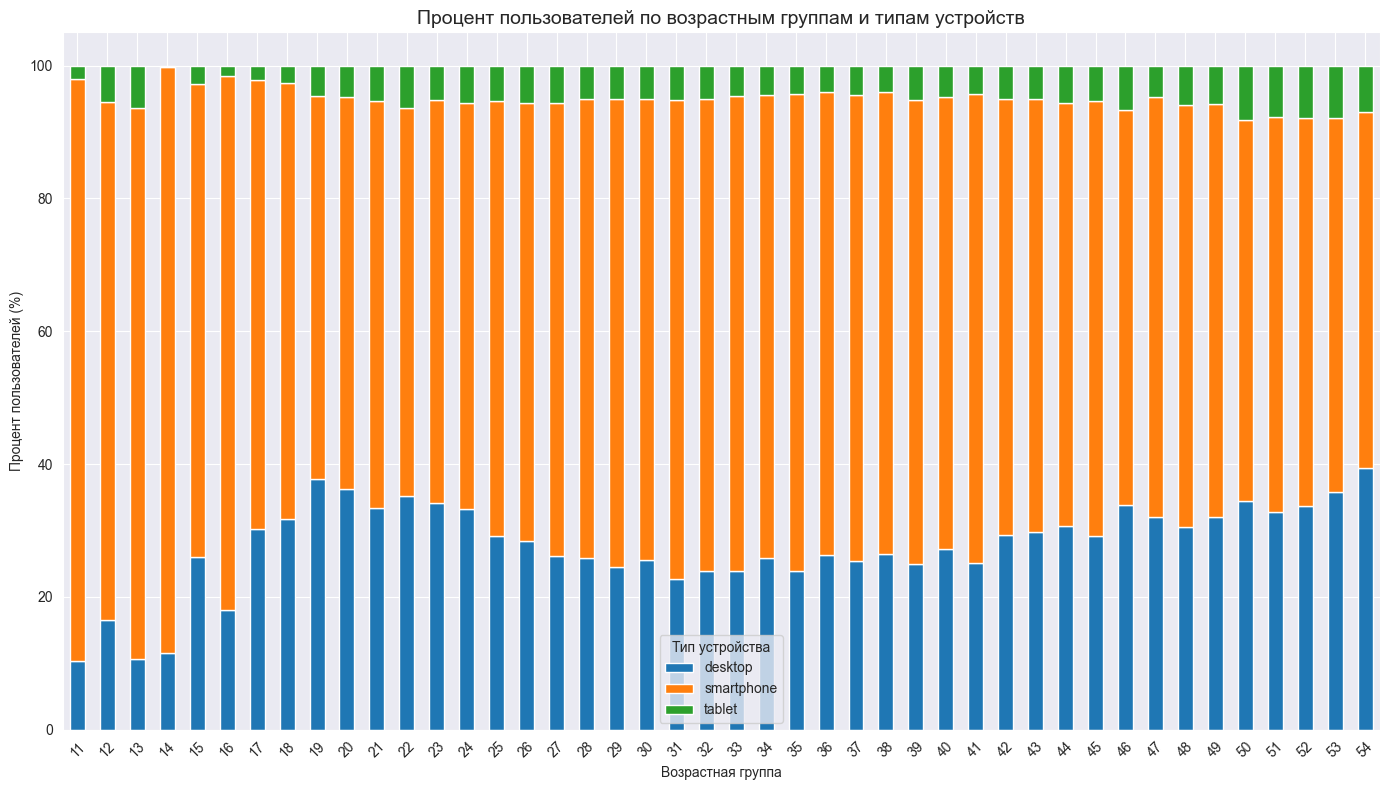

In [59]:
# Создаем сводную таблицу с количеством пользователей по типам устройств и возрастным группам
pivot_table_device_age = pd.pivot_table(
    train_all_events,
    values='viewer_uid',
    index='age',
    columns='ua_device_type',
    aggfunc='count',
    fill_value=0
)

# Рассчитываем общее количество пользователей в каждой возрастной группе
total_users_per_age_class = pivot_table_device_age.sum(axis=1)

# Рассчитываем проценты по каждому типу устройства относительно общего количества пользователей в возрастной группе
pivot_table_percentage = pivot_table_device_age.div(total_users_per_age_class, axis=0) * 100

# Сброс индексов для удобства
pivot_table_percentage = pivot_table_percentage.reset_index()

# Визуализация
pivot_table_percentage.plot(x='age', kind='bar', stacked=True, figsize=(14, 8))

# Настраиваем заголовок и оси
plt.title('Процент пользователей по возрастным группам и типам устройств', fontsize=14)
plt.xlabel('Возрастная группа')
plt.ylabel('Процент пользователей (%)')

plt.xticks(rotation=45)
plt.legend(title='Тип устройства')
plt.tight_layout()
plt.show()


Как видно с возрастом пользователи все чаще смотрять видео на компьютере и все меньше на телефоне до, примерное 20-22 здесь достигается пик, дальше их количество падает и после +.- 32 лет начинает расти. Скорее всего рост к 20 - 22 годам использование компьютера связанно с тем что многие из них студенты и часто работают за компьютером, потом постепенно интерес к просмотру роликов падает в целом и все меньше людей смотрят с телефона, с возрастом увеличивается популярность компьютером из - за простого неудобства использования ими телефона.

C:\Users\capy\AppData\Local\Temp\ipykernel_12636\2086029768.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pivot_table_views_age, x='age', y='total_watchtime', palette='viridis')


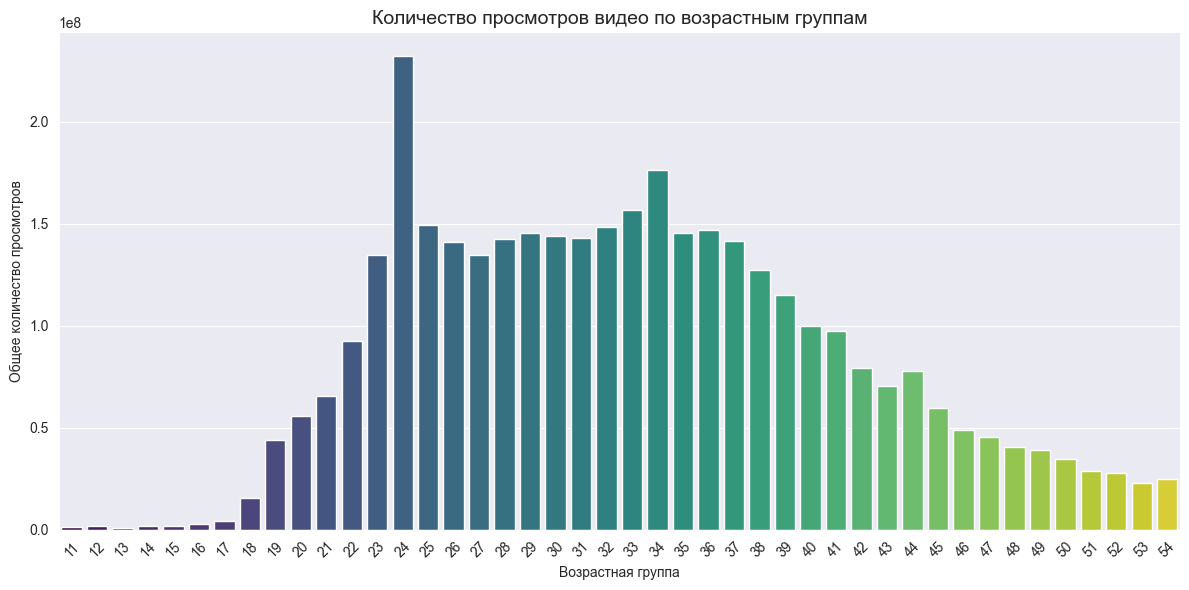

In [60]:
# Создаем сводную таблицу с количеством просмотров по возрастным группам
pivot_table_views_age = pd.pivot_table(
    train_all_events,
    values='total_watchtime',
    index='age',
    aggfunc='sum',
    fill_value=0
)

# Сброс индексов для удобства
pivot_table_views_age = pivot_table_views_age.reset_index()

# Визуализация
plt.figure(figsize=(12, 6))
sns.barplot(data=pivot_table_views_age, x='age', y='total_watchtime', palette='viridis')

# Настраиваем заголовок и оси
plt.title('Количество просмотров видео по возрастным группам', fontsize=14)
plt.xlabel('Возрастная группа')
plt.ylabel('Общее количество просмотров')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

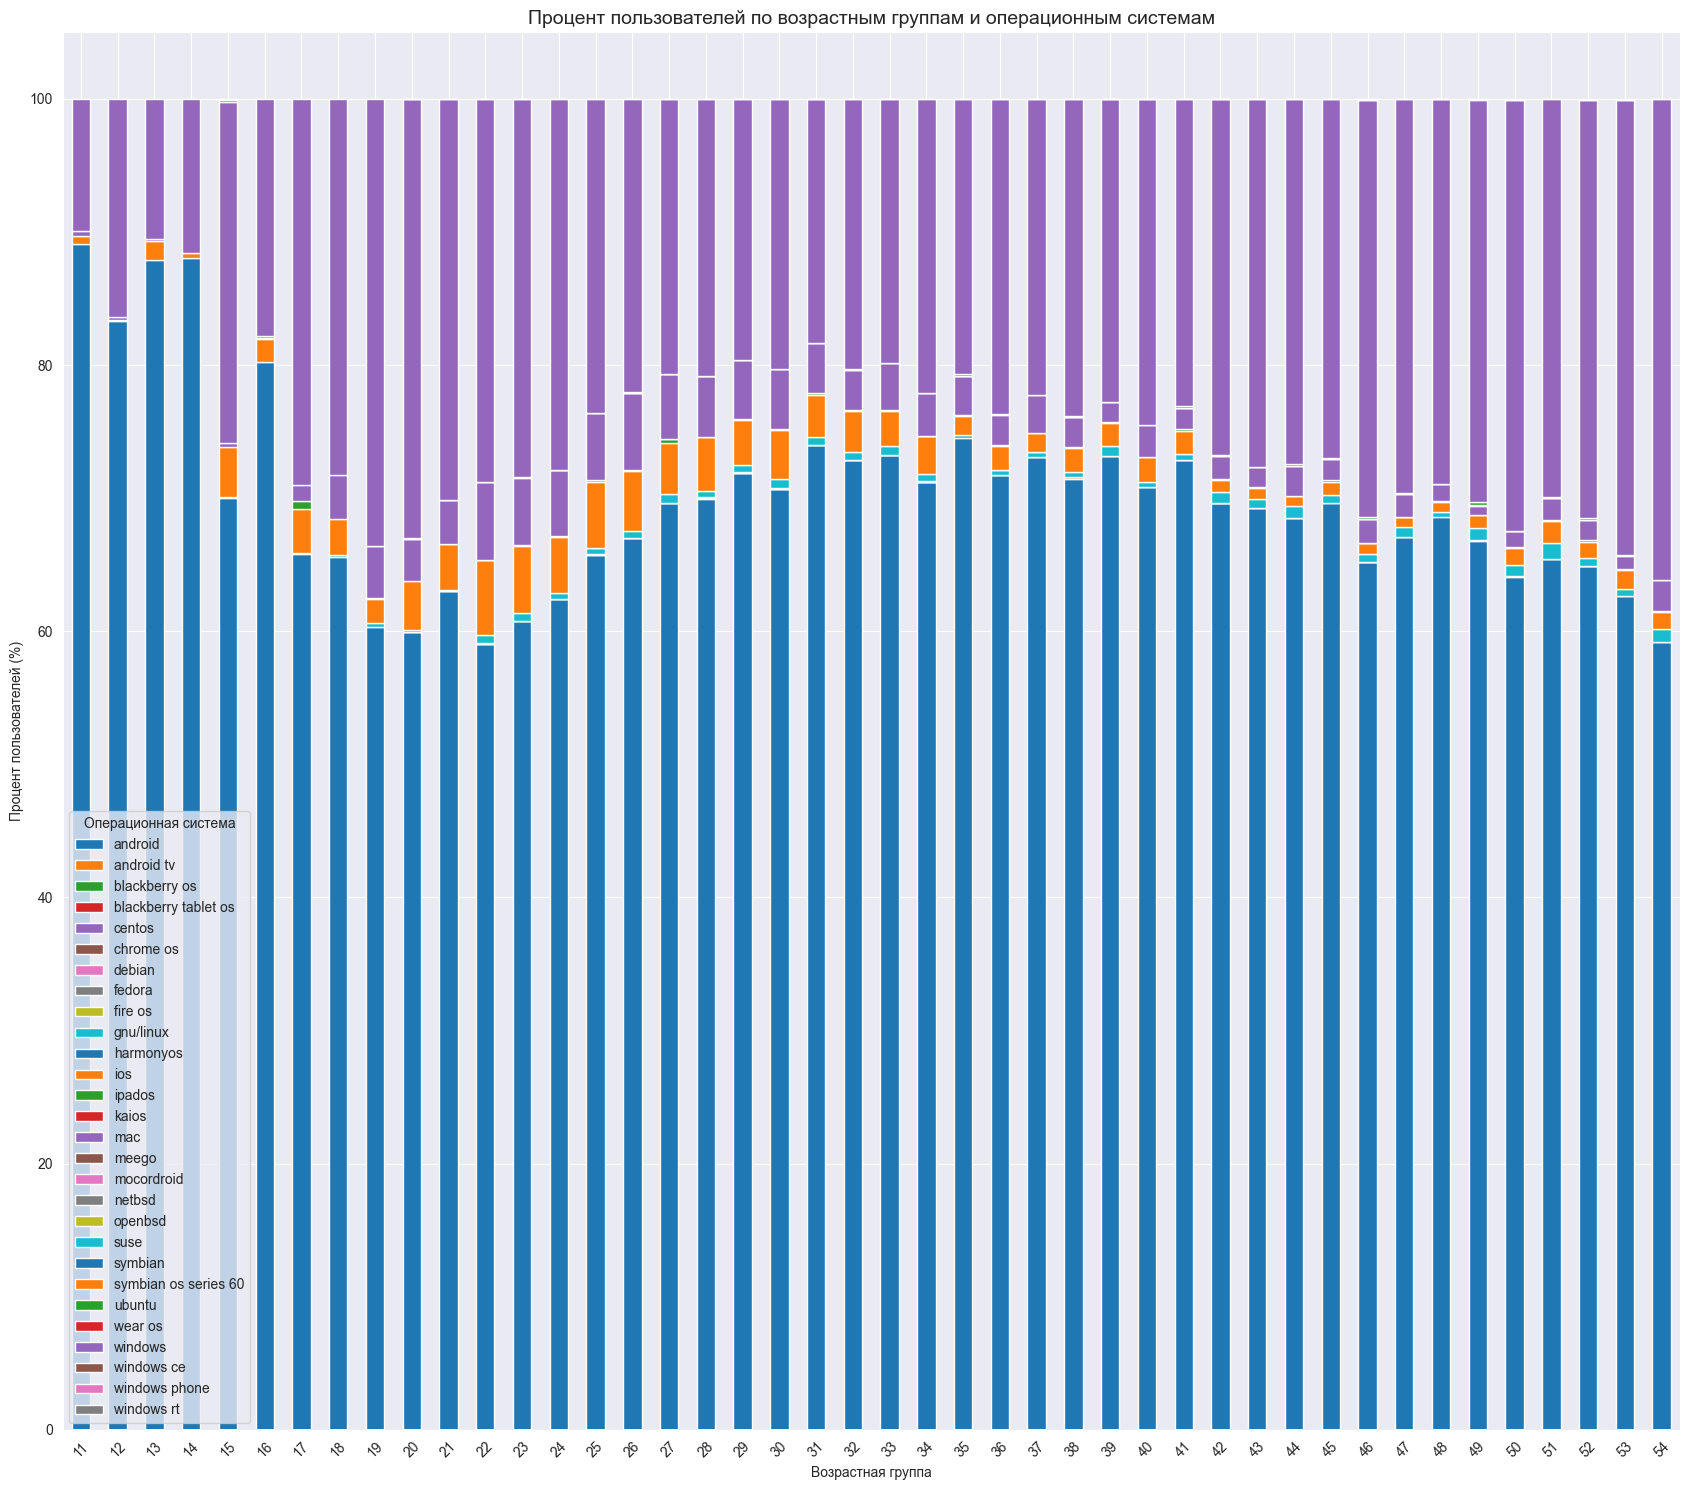

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Создаем сводную таблицу с количеством пользователей по операционным системам и возрастным группам
pivot_table_os_age = pd.pivot_table(
    train_all_events,
    values='viewer_uid',
    index='age',
    columns='ua_os',
    aggfunc='count',
    fill_value=0
)

# Рассчитываем общее количество пользователей в каждой возрастной группе
total_users_per_age_class = pivot_table_os_age.sum(axis=1)

# Рассчитываем проценты по каждому типу ОС относительно общего количества пользователей в возрастной группе
pivot_table_percentage = pivot_table_os_age.div(total_users_per_age_class, axis=0) * 100

# Сброс индексов для удобства
pivot_table_percentage = pivot_table_percentage.reset_index()

# Визуализация
pivot_table_percentage.plot(x='age', kind='bar', stacked=True, figsize=(17, 15))

# Настраиваем заголовок и оси
plt.title('Процент пользователей по возрастным группам и операционным системам', fontsize=14)
plt.xlabel('Возрастная группа')
plt.ylabel('Процент пользователей (%)')

plt.xticks(rotation=45)
plt.legend(title='Операционная система')
plt.tight_layout()
plt.show()


Результат крайне схож с результатом зависимости от устройств, оно и логично, основные операционные системы windows это пк, андроид это телефон, а android tv это телевизоры, стальные системы так не распространены, поэтому столбец с операционными системами в теории можно исключить т.к у нас уже есть столбец с типами устройств который крайне схож с данным(единственное он может оказывать влияние на пол, об этом чуть ниже).

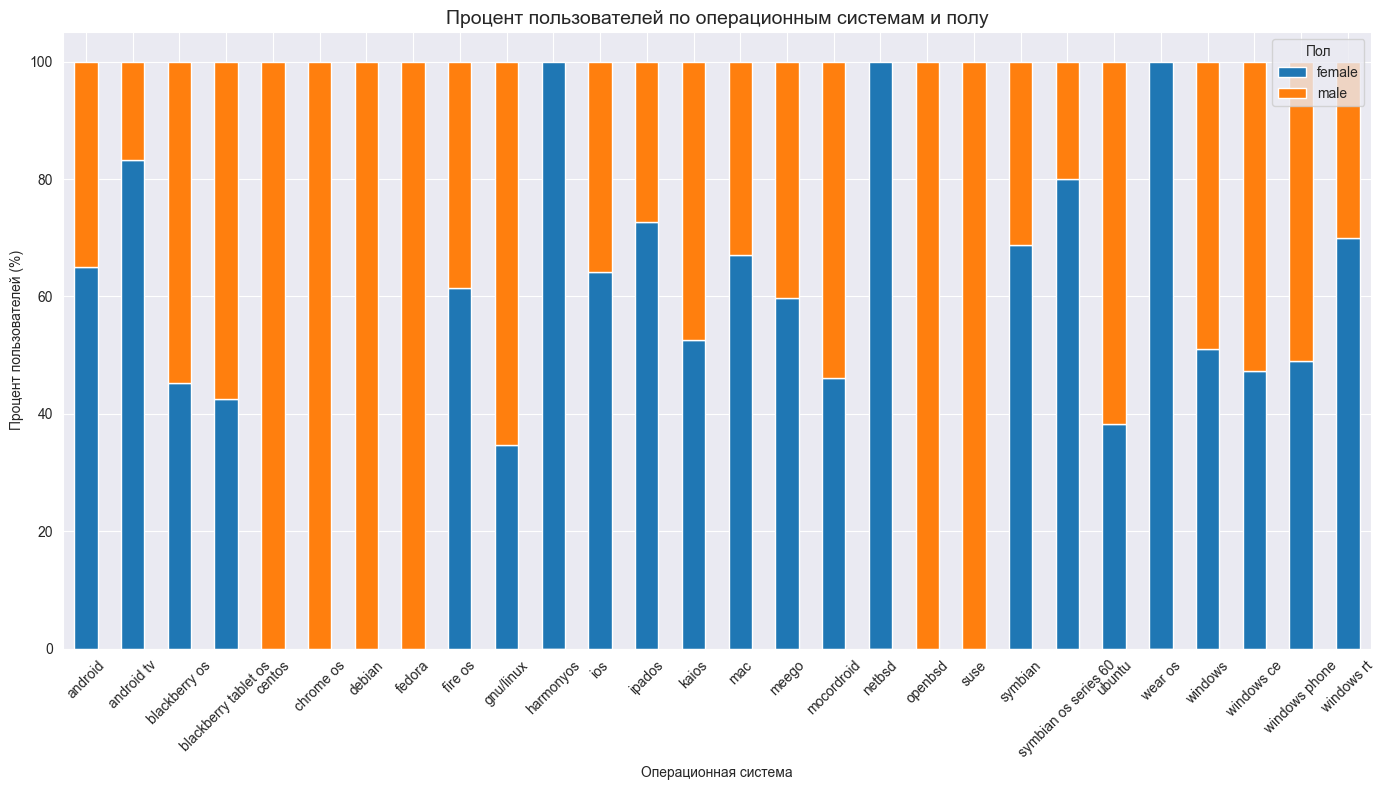

In [62]:
# Создаем сводную таблицу с количеством пользователей по полу и операционным системам
pivot_table_gender_os = pd.pivot_table(
    train_all_events,
    values='viewer_uid',
    index='ua_os',
    columns='sex',
    aggfunc='count',
    fill_value=0
)

# Рассчитываем общее количество пользователей в каждой операционной системе
total_users_per_os = pivot_table_gender_os.sum(axis=1)

# Рассчитываем проценты по каждому полу относительно общего количества пользователей в операционной системе
pivot_table_percentage_gender_os = pivot_table_gender_os.div(total_users_per_os, axis=0) * 100

# Сброс индексов для удобства
pivot_table_percentage_gender_os = pivot_table_percentage_gender_os.reset_index()

# Визуализация
pivot_table_percentage_gender_os.plot(x='ua_os', kind='bar', stacked=True, figsize=(14, 8))

# Настраиваем заголовок и оси
plt.title('Процент пользователей по операционным системам и полу', fontsize=14)
plt.xlabel('Операционная система')
plt.ylabel('Процент пользователей (%)')

plt.xticks(rotation=45)
plt.legend(title='Пол')
plt.tight_layout()
plt.show()


Как видно есть некоторое разделение популярности операционных систем между полами, между ними есть явная зависимость, какие - то системы более популярны среди женщин, а какие - то среди мужчин.

### Гипотеза: Часовые пики просмотров и их связь с возрастом и полом

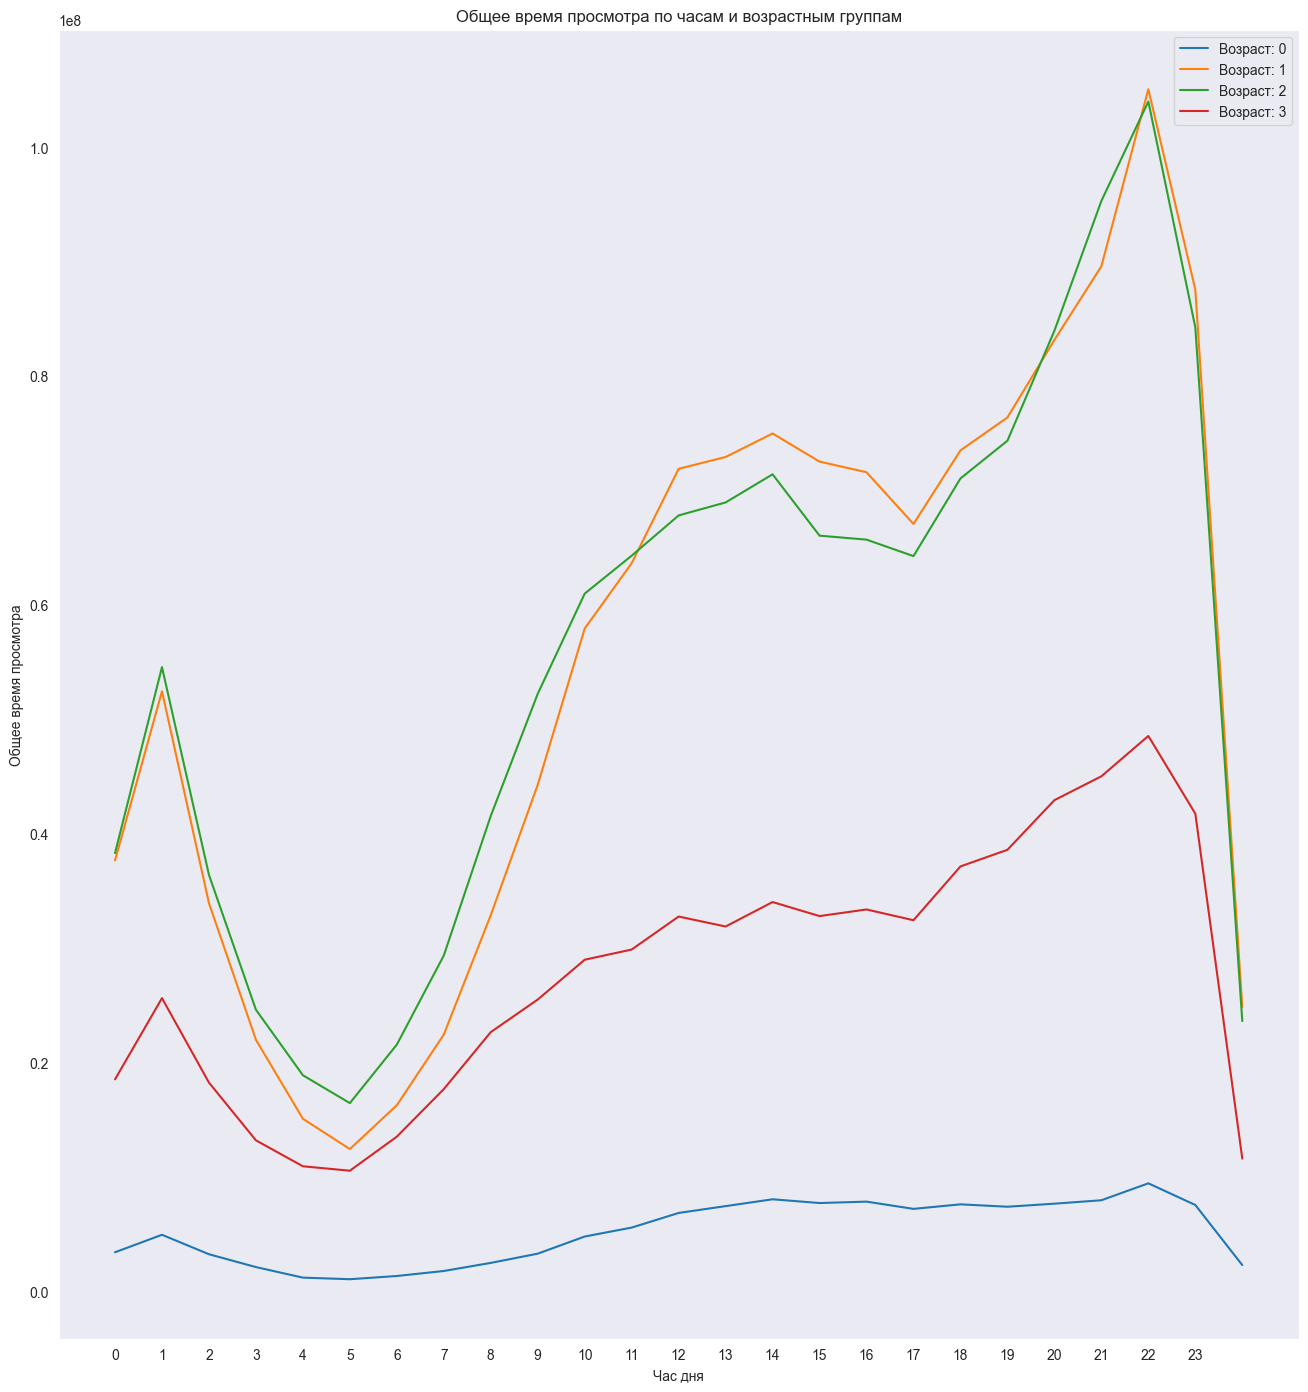

In [63]:
# Группировка по часу, возрасту и полу
grouped_data = train_all_events.groupby(['local_time', 'age_class']).agg({
    'total_watchtime': 'sum',
    'viewer_uid': 'count'  # количество уникальных зрителей
}).reset_index()

# Визуализация
plt.figure(figsize=(16, 17))
for age_group in grouped_data['age_class'].unique():
    subset = grouped_data[grouped_data['age_class'] == age_group]
    plt.plot(subset['local_time'], subset['total_watchtime'], label=f'Возраст: {age_group}')

plt.title('Общее время просмотра по часам и возрастным группам')
plt.xlabel('Час дня')
plt.ylabel('Общее время просмотра')
plt.xticks(range(24))  # часы от 0 до 23
plt.legend()
plt.grid()
plt.show()

как видим в целом паттерн активности схож для всех возрастных категорий, наибольший рост активности ближе к 10 часам вечера и быстрый спад на уровне 1 - 2 часов ночи. Но можно заметить небольшой провал активности в районе 5 часов для возрастных категорий 20 - 40 лет. В то время как до 20 лет активность держится на высоком уровне начиная с примерно 12 часов и практически не спадающий до полночи. Для категории 40+ с 12 до 18 часов активность устредненная, достижение пика наблюдается примерно в 9 - 10 часов вечера

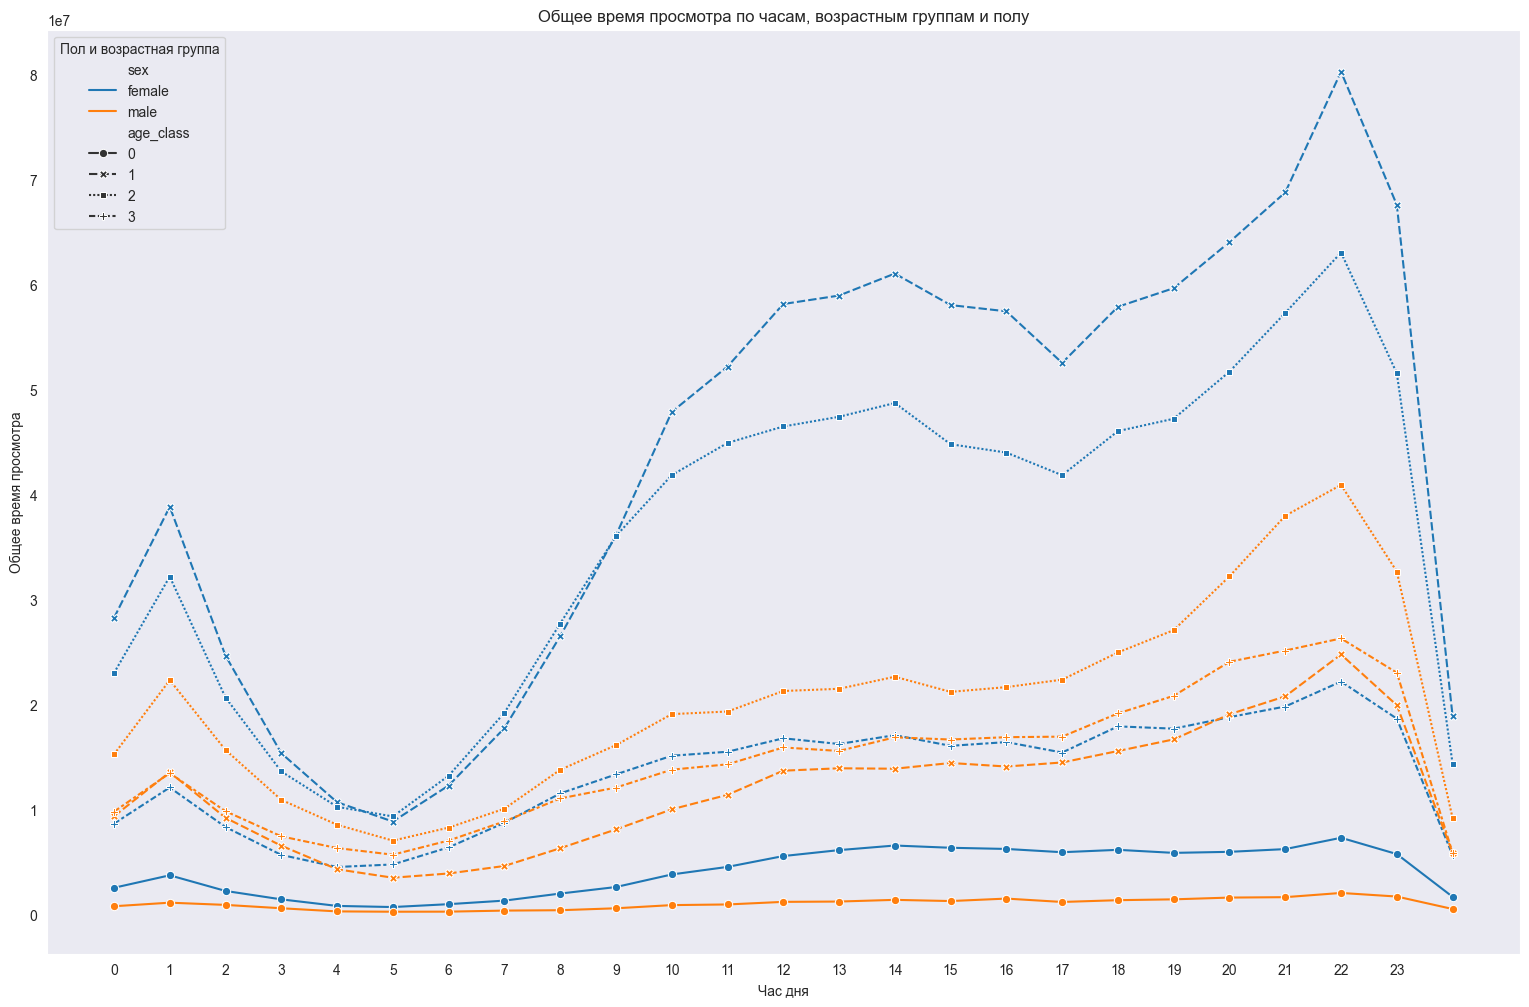

In [64]:
# Группировка по времени, возрасту и полу
grouped_data = train_all_events.groupby(['local_time', 'age_class', 'sex']).agg({
    'total_watchtime': 'sum',
    'viewer_uid': 'count'  # количество уникальных зрителей
}).reset_index()

# Визуализация
plt.figure(figsize=(19, 12))
sns.lineplot(data=grouped_data, x='local_time', y='total_watchtime', hue='sex', style='age_class', markers=True)

plt.title('Общее время просмотра по часам, возрастным группам и полу')
plt.xlabel('Час дня')
plt.ylabel('Общее время просмотра')
plt.xticks(range(24))  # часы от 0 до 23
plt.legend(title='Пол и возрастная группа')
plt.grid()
plt.show()


Как видно из графика уже с раздилением по полам, между полами паттерн поведения достаточно схож, но для женского насиления присущ более плавный рост с минимальными скачками, у мужкой же части видны более резкие провалы к примеру на уровне 18 часов.

### Гипотеза: День недели влияет на просмотры разных возрастных категорий и полов

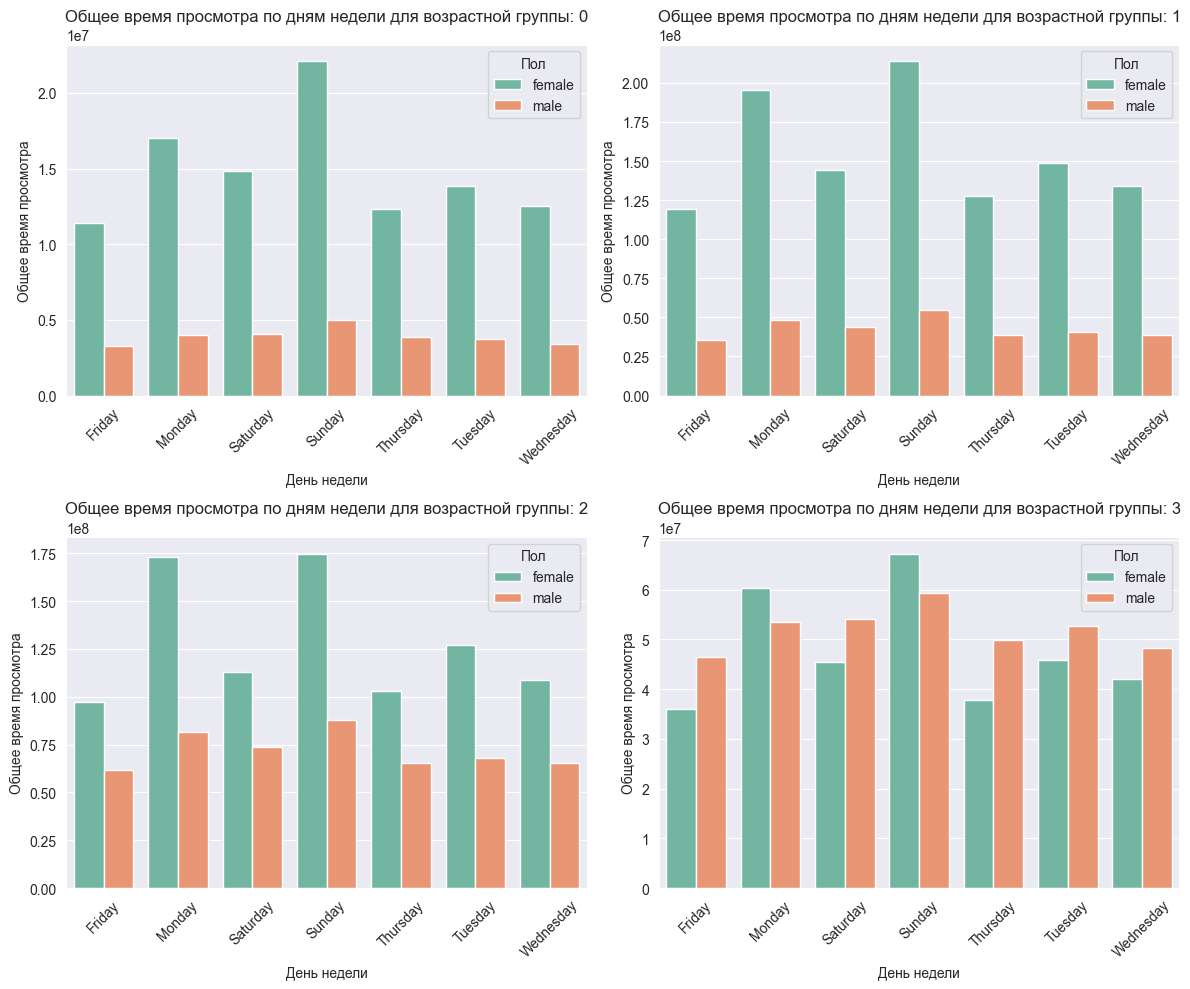

In [65]:
# Группировка по дню недели, возрасту и полу
grouped_data = train_all_events.groupby(['day_of_week', 'age_class', 'sex']).agg({
    'total_watchtime': 'sum',
    'viewer_uid': 'count'  # количество уникальных зрителей
}).reset_index()

# Уникальные возрастные группы
age_groups = grouped_data['age_class'].unique()

# Настройка сетки 2 на 2
n_rows = 2
n_cols = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 10))
axes = axes.flatten()  # Преобразуем в одномерный массив для удобства

# Визуализация для каждой возрастной группы
for i, age_group in enumerate(age_groups):
    subset = grouped_data[grouped_data['age_class'] == age_group]
    
    sns.barplot(data=subset, x='day_of_week', y='total_watchtime', hue='sex', palette='Set2', ax=axes[i])
    
    axes[i].set_title(f'Общее время просмотра по дням недели для возрастной группы: {age_group}')
    axes[i].set_xlabel('День недели')
    axes[i].set_ylabel('Общее время просмотра')
    axes[i].legend(title='Пол')
    axes[i].tick_params(axis='x', rotation=45)

# Удаляем лишние графики, если возрастных групп меньше 4
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()  # Автоматическая настройка отступов
plt.show()


C:\Users\capy\AppData\Local\Temp\ipykernel_12636\1331853538.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset_male, x='age_class', y='viewer_uid', ax=axes[0], palette='Blues')
C:\Users\capy\AppData\Local\Temp\ipykernel_12636\1331853538.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset_female, x='age_class', y='viewer_uid', ax=axes[1], palette='Reds')


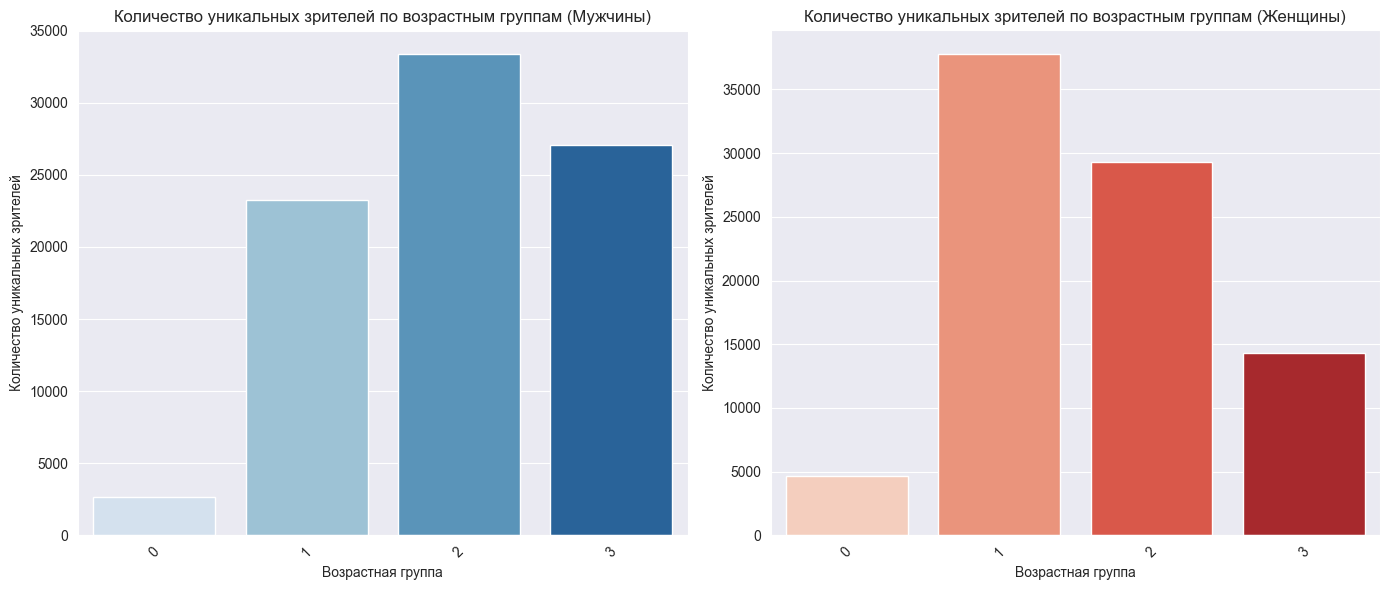

In [66]:
# Группировка по возрастным группам и полу
grouped_data = train_all_events.groupby(['age_class', 'sex']).agg({
    'viewer_uid': 'nunique'  # количество уникальных зрителей
}).reset_index()

# Уникальные значения пола
genders = grouped_data['sex'].unique()

# Настройка графиков
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Визуализация для мужчин
subset_male = grouped_data[grouped_data['sex'] == 'male']
sns.barplot(data=subset_male, x='age_class', y='viewer_uid', ax=axes[0], palette='Blues')
axes[0].set_title('Количество уникальных зрителей по возрастным группам (Мужчины)')
axes[0].set_xlabel('Возрастная группа')
axes[0].set_ylabel('Количество уникальных зрителей')
axes[0].tick_params(axis='x', rotation=45)

# Визуализация для женщин
subset_female = grouped_data[grouped_data['sex'] == 'female']
sns.barplot(data=subset_female, x='age_class', y='viewer_uid', ax=axes[1], palette='Reds')
axes[1].set_title('Количество уникальных зрителей по возрастным группам (Женщины)')
axes[1].set_xlabel('Возрастная группа')
axes[1].set_ylabel('Количество уникальных зрителей')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()  # Автоматическая настройка отступов
plt.show()


Из прошлого графика явно видно, что у мужчин возрастных категорий до 30 лет явно преобладает количество просмотров у мужчин в 4 5 раз в то время как женщин в данных категориях больше чем мужчин, это говорит о том что среди данной возрастной категории больше популярностью сервис пользуется у мужчин. Примерно тоже и в категории 30 - 40 лет, но здесь не столь велика разница с учетом, что число женщин данной категории меньше. В категории же 40+ лет количество женщин явно меньше, но при этом количество просмотров примерно на одном уровне с мужчинами, что говорит о большей популярности сервиса в данной возрастной категории у женщин.

### Гипотеза: Влияние продолжительности видео на пол и возраст

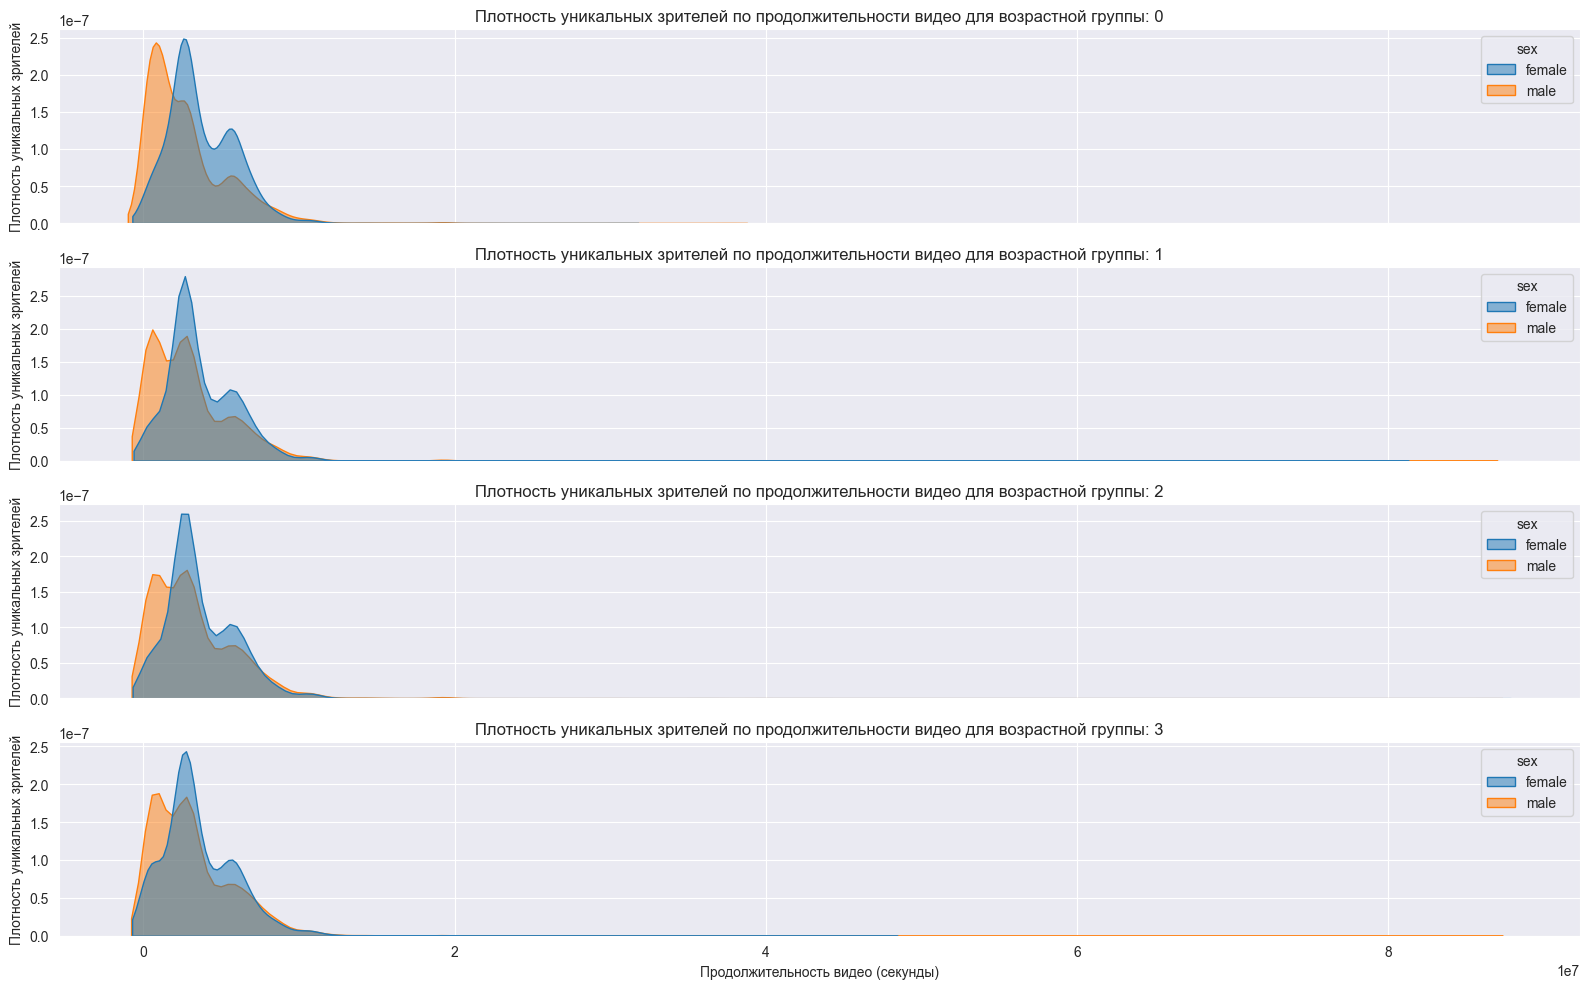

In [67]:
# Группировка данных по возрасту, полу и продолжительности видео
grouped_data = train_all_events.groupby(['age_class', 'sex', 'duration']).agg({
    'viewer_uid': 'nunique',  # количество уникальных зрителей
    'total_watchtime': 'sum'   # общее время просмотра
}).reset_index()

# Уникальные возрастные группы
age_groups = grouped_data['age_class'].unique()

# Настройка сетки графиков с увеличенными размерами
fig, axes = plt.subplots(len(age_groups), 1, figsize=(16, 10), sharex=True)

for i, age_group in enumerate(age_groups):
    subset = grouped_data[grouped_data['age_class'] == age_group]
    sns.kdeplot(data=subset, x='duration', weights='viewer_uid', hue='sex', fill=True, ax=axes[i], common_norm=False, alpha=0.5)
    axes[i].set_title(f'Плотность уникальных зрителей по продолжительности видео для возрастной группы: {age_group}')
    axes[i].set_ylabel('Плотность уникальных зрителей')
    axes[i].grid(True)  # Добавление сетки на график

plt.xlabel('Продолжительность видео (секунды)')
plt.tight_layout()
plt.show()

Как видно из графика распределения плотности интерес от длительности для мужчин практически неизменен, у женщин плотность коротких роликов после 20 немного падает. Касательно полов: мужчины в большей мере предпочитают длительные ролики в отличии от женщин.

### Гипотеза: Возраст и пол зависит от популярности каналов и категорий каналов

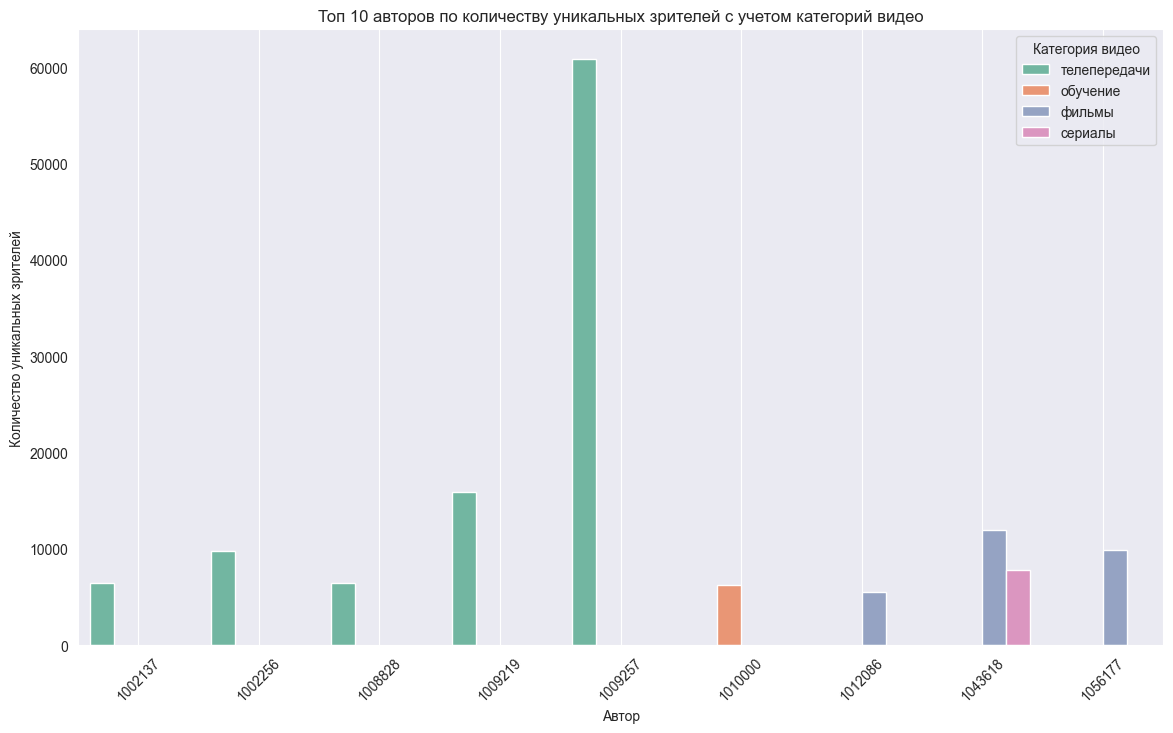

In [68]:
# Группировка по авторам, возрасту, полу и категории
author_category_data = train_all_events.groupby(['author_id', 'age_class', 'sex', 'category']).agg({
    'viewer_uid': 'nunique',  # количество уникальных зрителей
    'total_watchtime': 'sum'   # общее время просмотра
}).reset_index()

# Подсчет уникальных зрителей и среднего времени просмотра по авторам и категориям
author_category_popularity = author_category_data.groupby(['author_id', 'category']).agg({
    'viewer_uid': 'sum',  # общее количество уникальных зрителей
    'total_watchtime': 'mean'  # среднее время просмотра
}).reset_index().sort_values(by='viewer_uid', ascending=False)

top_authors_categories = author_category_popularity.head(10)  # Топ 10 авторов по категориям

# Настройка графиков для топ-авторов по категориям
plt.figure(figsize=(14, 8))
sns.barplot(data=top_authors_categories, x='author_id', y='viewer_uid', hue='category', palette='Set2')
plt.title('Топ 10 авторов по количеству уникальных зрителей с учетом категорий видео')
plt.xlabel('Автор')
plt.ylabel('Количество уникальных зрителей')
plt.xticks(rotation=45)
plt.grid()
plt.legend(title='Категория видео')
plt.show()


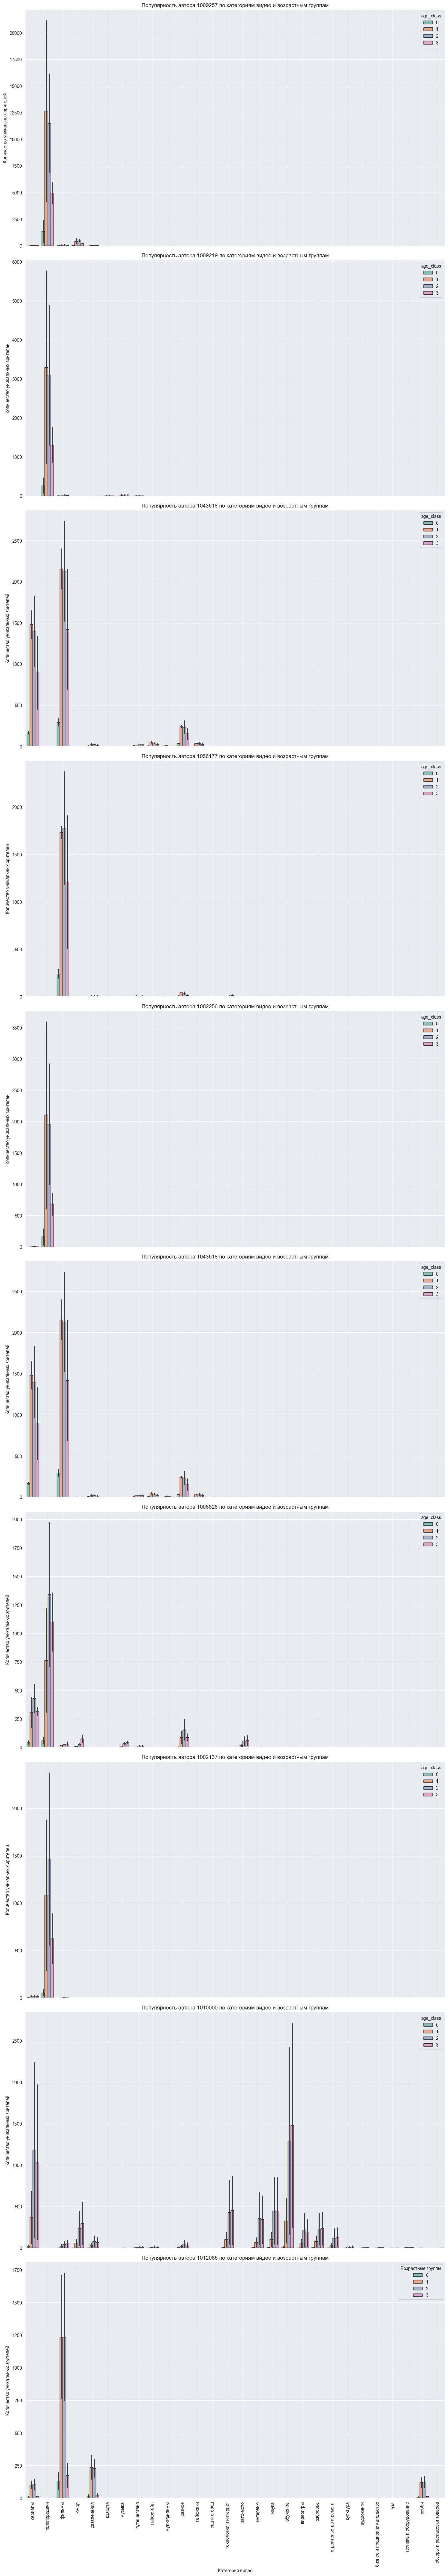

In [69]:
# Настройка графиков
fig, axes = plt.subplots(len(top_authors_categories), 1, figsize=(14, 8 * len(top_authors_categories)), sharex=True)

for i, author in enumerate(top_authors_categories['author_id']):
    subset = author_category_data[author_category_data['author_id'] == author]
    
    # Использование различных цветов и обводки для мужчин и женщин
    sns.barplot(data=subset, x='category', y='viewer_uid', hue='age_class', ax=axes[i], palette='Set2',
                alpha=0.8, edgecolor='black')
    
    axes[i].set_title(f'Популярность автора {author} по категориям видео и возрастным группам')
    axes[i].set_ylabel('Количество уникальных зрителей')
    axes[i].grid(True)
    
    # Установка вертикальных названий категорий
    axes[i].tick_params(axis='x', rotation=90)

# Добавление легенды с явным разделением
axes[i].legend(title='Возрастные группы', loc='upper right')

plt.xlabel('Категория видео')
plt.tight_layout()
plt.show()


Результат еще раз подтверждает что наиболее популярными являются категории телепередачи и сериалы, но также в топе 10 есть авторы основной контент которых фильмы или обучения, то есть менее популярные категории чем телепередачи и сериалы. Распределение же просмотров разных возрастных категорий для одной категории видео в большинстве совпадают даже для разных авторов.